# Частотный анализ
Допустим, филолог разбирается в труде "Трактат о дешифровке криптографических сообщений" Абу Юсуфа Якуб аль-Кинди, арабского философа, первым описавшего метод частотного криптоанализа.

Он решил проделать то же самое с текстами на английском языке.
Итак, в [файле](https://drive.google.com/file/d/1NPpXOiszT39m39tFKm2wQTpFQDCx3AQY/view?usp=sharing) `orwell_1984.txt` дан текст на английском языке. Филологу требуется найти частоты букв.

Предложим ему следующий вариант: для подсчёта того, сколько раз встречается каждая буква, воспользуемся методом `.count()` строки. А все английские буквы от `'a'` до `'z'` возьмём из библиотеки string: `string.ascii_lowercase` содержит их в алфавитном порядке.

In [ ]:
!wget -O "orwell_1984.txt" "https://drive.google.com/uc?id=1NPpXOiszT39m39tFKm2wQTpFQDCx3AQY&export=download"

--2021-11-07 20:51:52--  https://drive.google.com/uc?id=1NPpXOiszT39m39tFKm2wQTpFQDCx3AQY&export=download
Resolving drive.google.com (drive.google.com)... 108.177.125.100, 108.177.125.102, 108.177.125.101, ...
Connecting to drive.google.com (drive.google.com)|108.177.125.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fff37gclm9v7ka4384qoaekhc0ggtvks/1636318275000/05476118052512889131/*/1NPpXOiszT39m39tFKm2wQTpFQDCx3AQY?e=download [following]
--2021-11-07 20:51:53--  https://doc-14-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fff37gclm9v7ka4384qoaekhc0ggtvks/1636318275000/05476118052512889131/*/1NPpXOiszT39m39tFKm2wQTpFQDCx3AQY?e=download
Resolving doc-14-1g-docs.googleusercontent.com (doc-14-1g-docs.googleusercontent.com)... 108.177.125.132, 2404:6800:4008:c01::84
Connecting to doc-14-1g-docs.googleusercontent.com (d

In [ ]:
import string

with open("orwell_1984.txt") as file:
    text = file.read()
    
for letter in string.ascii_lowercase:
    letter_frequency = text.count(letter)
    print(letter, letter_frequency)

a 55571
b 10287
c 17456
d 30515
e 90345
f 15075
g 13180
h 43223
i 45289
j 597
k 6102
l 30003
m 16336
n 48331
o 52878
p 12076
q 563
r 40948
s 42759
t 62933
u 19611
v 6421
w 16574
x 1182
y 13485
z 539


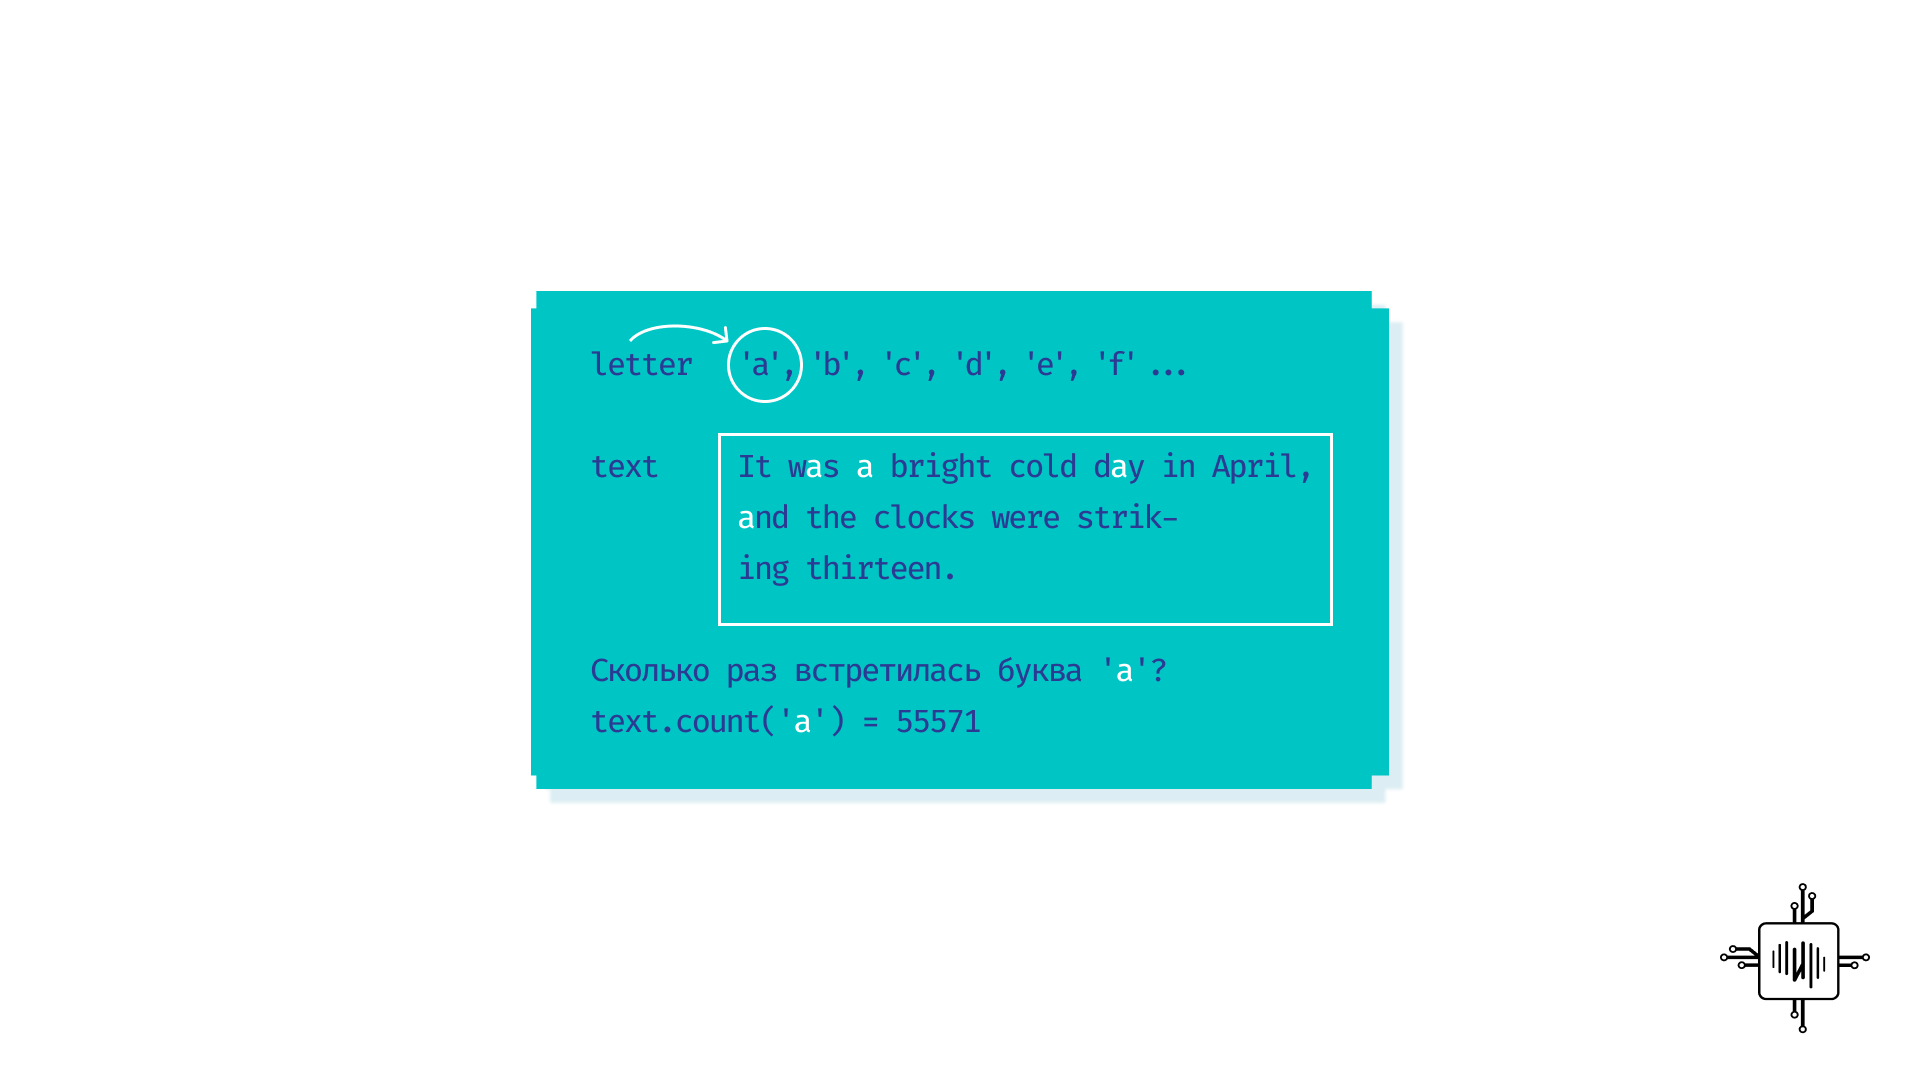

Однако, мы не сохранили нигде частоты букв — как только находили, так сразу и печатали. А хорошо бы иметь все числа в массиве, чтобы можно было его, например, отсортировать.

In [ ]:
import string

with open("orwell_1984.txt") as file:
    text = file.read()
    
letters_frequencies = []
for letter in string.ascii_lowercase:
    letter_frequency = text.count(letter)
    letters_frequencies.append(letter_frequency)

Частоты букв в массиве `letters_frequencies` идут по порядку, начиная от нуля. Для одновременной распечатки букв и записанных в массиве частот воспользуемся функцией `zip`:

In [ ]:
for letter, letter_frequency in zip(string.ascii_lowercase, letters_frequencies):
    print(letter, letter_frequency)

a 55571
b 10287
c 17456
d 30515
e 90345
f 15075
g 13180
h 43223
i 45289
j 597
k 6102
l 30003
m 16336
n 48331
o 52878
p 12076
q 563
r 40948
s 42759
t 62933
u 19611
v 6421
w 16574
x 1182
y 13485
z 539


Мы пытаемся отдать результаты филологу, но он хочет увидеть эту таблицу в отсортированном виде по убыванию частоты.

Воспользуемся для этого функцией `sorted`, которой дадим результат работы `zip`. Заодно визуально сократим процесс создания списка `letters_frequencies`, используя вместо `append` в цикле `for` списковое включение:

In [ ]:
import string

with open("orwell_1984.txt") as file:
    text = file.read()

letters_frequencies = [text.count(letter) for letter in string.ascii_lowercase]

sorted_letters_and_frequencies = sorted(zip(string.ascii_lowercase, letters_frequencies),
                                        key=lambda pair: pair[1], reverse=True)
for letter, frequency in sorted_letters_and_frequencies:
    print(letter, frequency)

e 90345
t 62933
a 55571
o 52878
n 48331
i 45289
h 43223
s 42759
r 40948
d 30515
l 30003
u 19611
c 17456
w 16574
m 16336
f 15075
y 13485
g 13180
p 12076
b 10287
v 6421
k 6102
x 1182
j 597
q 563
z 539


## Вопрос эффективности
Довольный филолог получает нашу программу и уходит анализировать свои тексты, но вскоре он возвращается недовольный. Оказалось, что ему нужно анализировать файлы настолько большого размера, что переменная `text` просто не помещается в памяти.

Кроме того, вызов `text.count(letter)` выполняется столько раз, сколько букв в алфавите, т.е. весь текст *просматривается заново* для подсчёта каждого нового вида букв. И если для английского алфавита этот фактор равен 26 буквам, то что будет для китайского языка, где только самых общеупотребительных иероглифов 500, а для чтения газет нужно уже 3000...

Итак, возник вопрос эффективности алгоритма. Требования:
1. Во-первых, нужно считывать файл посимвольно, а не целиком.
2. Во-вторых, прочитывать файл нужно только один раз.

Плюс в том, что мы заранее знаем какие буквы нам могут встретиться в тексте. Значит, массив счётчиков частоты букв мы можем создать заранее, изначально заполнив его нулями.

Кроме этого, если мы сможем быстро сопоставлять букву её индексу в массиве счётчиков, мы будем просто *инкрементировать* нужный счётчик в этом массиве.

In [ ]:
def letter_index(letter: str):
    """ Возвращает индекс буквы в английском алфавите (считая от нуля)
        работает с буквами в ВЕРХНЕМ и нижнем регистрах.
        
        >>> letter_index('a')
        0
        >>> letter_index('z')
        25
    """
    letter = letter.lower()
    assert len(letter) == 1, "Функцию можно вызывать только для символов (строк длины 1)."
    assert 'a' <= letter <= 'z', "Допускаются только английские символы (классическая латиница)."
    return ord(letter) - ord('a')

Здесь мы создали *пользовательскую функцию* с параметром и возвращаемым значением.
Выражение после слова `return` будет посчитано и возвращено в то место, где функция будет вызвана.


Обратите внимание на несколько деталей:
1. В заголовке после имени параметра `letter` стоит двоеточие и написано `str`. Это *аннотация типа*
2. После заголовка идёт многострочная строка с комментарием. Это не совсем комментарий, а *документ-строка*,
   описывающая поведение функции и допустимые значения параметров.
3. В теле функции присутствуют строки, начинающиеся со слова `assert`. Это *контракт функции* --- условия, обязательные для продолжения нормальной работы алгоритма. Если они окажутся нарушенными, значит контракт не соблюдён, и произойдёт аварийная остановка выполнения программы.

Содержательно в этой функции мы воспользовались методом `lower()` для понижения регистра символа и `ord()` для того, чтобы узнать его код в кодовой таблице символов Unicode. Если отказаться от красоты и качества кода, та же функция может быть написана коротко:

In [ ]:
def letter_index(letter):
    return ord(letter.lower()) - ord('a')

Подумайте, какой вариант функции вам больше нравится?

Настало время выполнить частотный анализ:

In [ ]:
!wget -O "big_one.txt" "https://drive.google.com/uc?id=1O2NiLsV868QmPSGXh4qxxk6YP-1_OaIa&export=download"

--2021-11-07 21:04:14--  https://drive.google.com/uc?id=1O2NiLsV868QmPSGXh4qxxk6YP-1_OaIa&export=download
Resolving drive.google.com (drive.google.com)... 108.177.125.100, 108.177.125.138, 108.177.125.113, ...
Connecting to drive.google.com (drive.google.com)|108.177.125.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bfsme6l5d9nrfe872hsmrq1nivgs5vl6/1636319025000/05476118052512889131/*/1O2NiLsV868QmPSGXh4qxxk6YP-1_OaIa?e=download [following]
--2021-11-07 21:04:15--  https://doc-10-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bfsme6l5d9nrfe872hsmrq1nivgs5vl6/1636319025000/05476118052512889131/*/1O2NiLsV868QmPSGXh4qxxk6YP-1_OaIa?e=download
Resolving doc-10-1g-docs.googleusercontent.com (doc-10-1g-docs.googleusercontent.com)... 108.177.125.132, 2404:6800:4008:c01::84
Connecting to doc-10-1g-docs.googleusercontent.com (d

In [ ]:
import string

letters_frequencies = [0] * 26

with open("big_one.txt") as file:
    symbol = file.read(1)
    while symbol:
        if 'a' <= symbol.lower() <= 'z':  # считываем частоты только для латиницы - остальное игнорируем
            index = letter_index(symbol)
            letters_frequencies[index] += 1
        symbol = file.read(1)

# представление результата подсчёта:
sorted_letters_and_frequencies = sorted(zip(string.ascii_lowercase, letters_frequencies),
                                        key=lambda pair: pair[1], reverse=True)
for letter, frequency in sorted_letters_and_frequencies:
    print(letter, frequency)

e 903450
t 629330
a 555710
o 528780
n 483310
i 452890
h 432230
s 427590
r 409480
d 305150
l 300030
u 196110
c 174560
w 165740
m 163360
f 150750
y 134850
g 131800
p 120760
b 102870
v 64210
k 61020
x 11820
j 5970
q 5630
z 5390


# Тип set. Множества и работа с ними
Для решения предыдущих задач мы пользовались списками. В них соблюдается порядок, но зато медленно работает поиск элемента по значению. В Python есть и другие виды *контейнеров*. 

**Множество** --- это контейнер, в котором порядок элементов не сохраняется и даже может изменяться, но многие операции происходят очень быстро и естественно.

Создать множество можно при помощи перечисления значений через запятую *в фигурных скобках* или при помощи конструктора `set`:

In [ ]:
the_set = {2, 3, 5, 7, 11, 13, 17, 19}
print(the_set, type(the_set), len(the_set))

{2, 3, 5, 7, 11, 13, 17, 19} <class 'set'> 8


In [ ]:
the_set = set(range(10, 100, 10))
print(the_set, type(the_set), len(the_set))

{70, 40, 10, 80, 50, 20, 90, 60, 30} <class 'set'> 9


Как и в математике, в Python есть *пустое множество*:

In [ ]:
the_set = set()
print(the_set, type(the_set), len(the_set))

set() <class 'set'> 0


Элемент не может входить в множество дважды или более. Любое значение либо входит в множество, либо не входит в него. В результате, в отличие от списка, *все значения в множестве уникальны*:

In [ ]:
the_list = [5, 7, 8, 6, 9,1, 2, 3, 4, 8, 7, 6, 5, 4, 3, 2, 1, 5, 2, 20, 10, 5, 15, 50]
the_set = set(the_list)
print(the_set)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 50, 20}


Множества в Python отражают математический концепт множества, однако применяют их не только математики. Например, биологи всё время работают с *множествами животных*.

### Простая задача для биолога

Итак, у биолога есть [файл](https://drive.google.com/file/d/1rCj60YKD5Q06amQswDtjaqsDhEox5Qlw/view?usp=sharing) `animals.txt` с названиями животных --- каждое в новой строке. Однако, много строк в файле повторяются. Биолог хочет узнать сколько в этой базе уникальных названий животных.

In [ ]:
!wget -O "animals.txt" "https://drive.google.com/uc?id=1rCj60YKD5Q06amQswDtjaqsDhEox5Qlw&export=download"

--2021-11-07 20:53:55--  https://drive.google.com/uc?id=1rCj60YKD5Q06amQswDtjaqsDhEox5Qlw&export=download
Resolving drive.google.com (drive.google.com)... 108.177.125.139, 108.177.125.100, 108.177.125.101, ...
Connecting to drive.google.com (drive.google.com)|108.177.125.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4mvt7imu5onj6c0ugfgv24q2usukqr05/1636318425000/05476118052512889131/*/1rCj60YKD5Q06amQswDtjaqsDhEox5Qlw?e=download [following]
--2021-11-07 20:53:56--  https://doc-00-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4mvt7imu5onj6c0ugfgv24q2usukqr05/1636318425000/05476118052512889131/*/1rCj60YKD5Q06amQswDtjaqsDhEox5Qlw?e=download
Resolving doc-00-1g-docs.googleusercontent.com (doc-00-1g-docs.googleusercontent.com)... 108.177.125.132, 2404:6800:4008:c01::84
Connecting to doc-00-1g-docs.googleusercontent.com (d

In [ ]:
with open('animals.txt') as file:
    animals = set(line.strip() for line in file)  # немного "магии" с файлом, как с итерируемым объектом
    print(animals, len(animals))

{'слон', 'муха', 'щука', 'орангутан', 'лебедь', 'жаба', 'гусь', 'мартышка'} 8


В примере выше можно увидеть, что названия животных идут в каком-то странном порядке --- не по алфавиту (лексикографически) и не в оригинальном порядке их добавления в множество. Увы, это то, чем приходится расплачиваться за *скорость поиска в множестве*.

## Множество — итерируемый объект
Элементы множества можно перебирать циклом `for`, его можно распаковывать или отдавать в функции конвейерной обработки.

In [ ]:
for animal in animals:
    print("Животное:", animal)

Животное: мартышка
Животное: орангутан
Животное: муха
Животное: жаба
Животное: лебедь
Животное: слон
Животное: щука
Животное: гусь


In [ ]:
print(*animals, sep='; ')

мартышка; орангутан; муха; жаба; лебедь; слон; щука; гусь


In [ ]:
print(*map(lambda animal: animal.title(), filter(lambda animal: animal[-1] == 'а', animals)))

Мартышка Муха Жаба Щука


## Принадлежность множеству
В математике для указания того, что элемент принадлежит множеству есть нотация $x \in A$, что не принадлежит: $y \notin A$

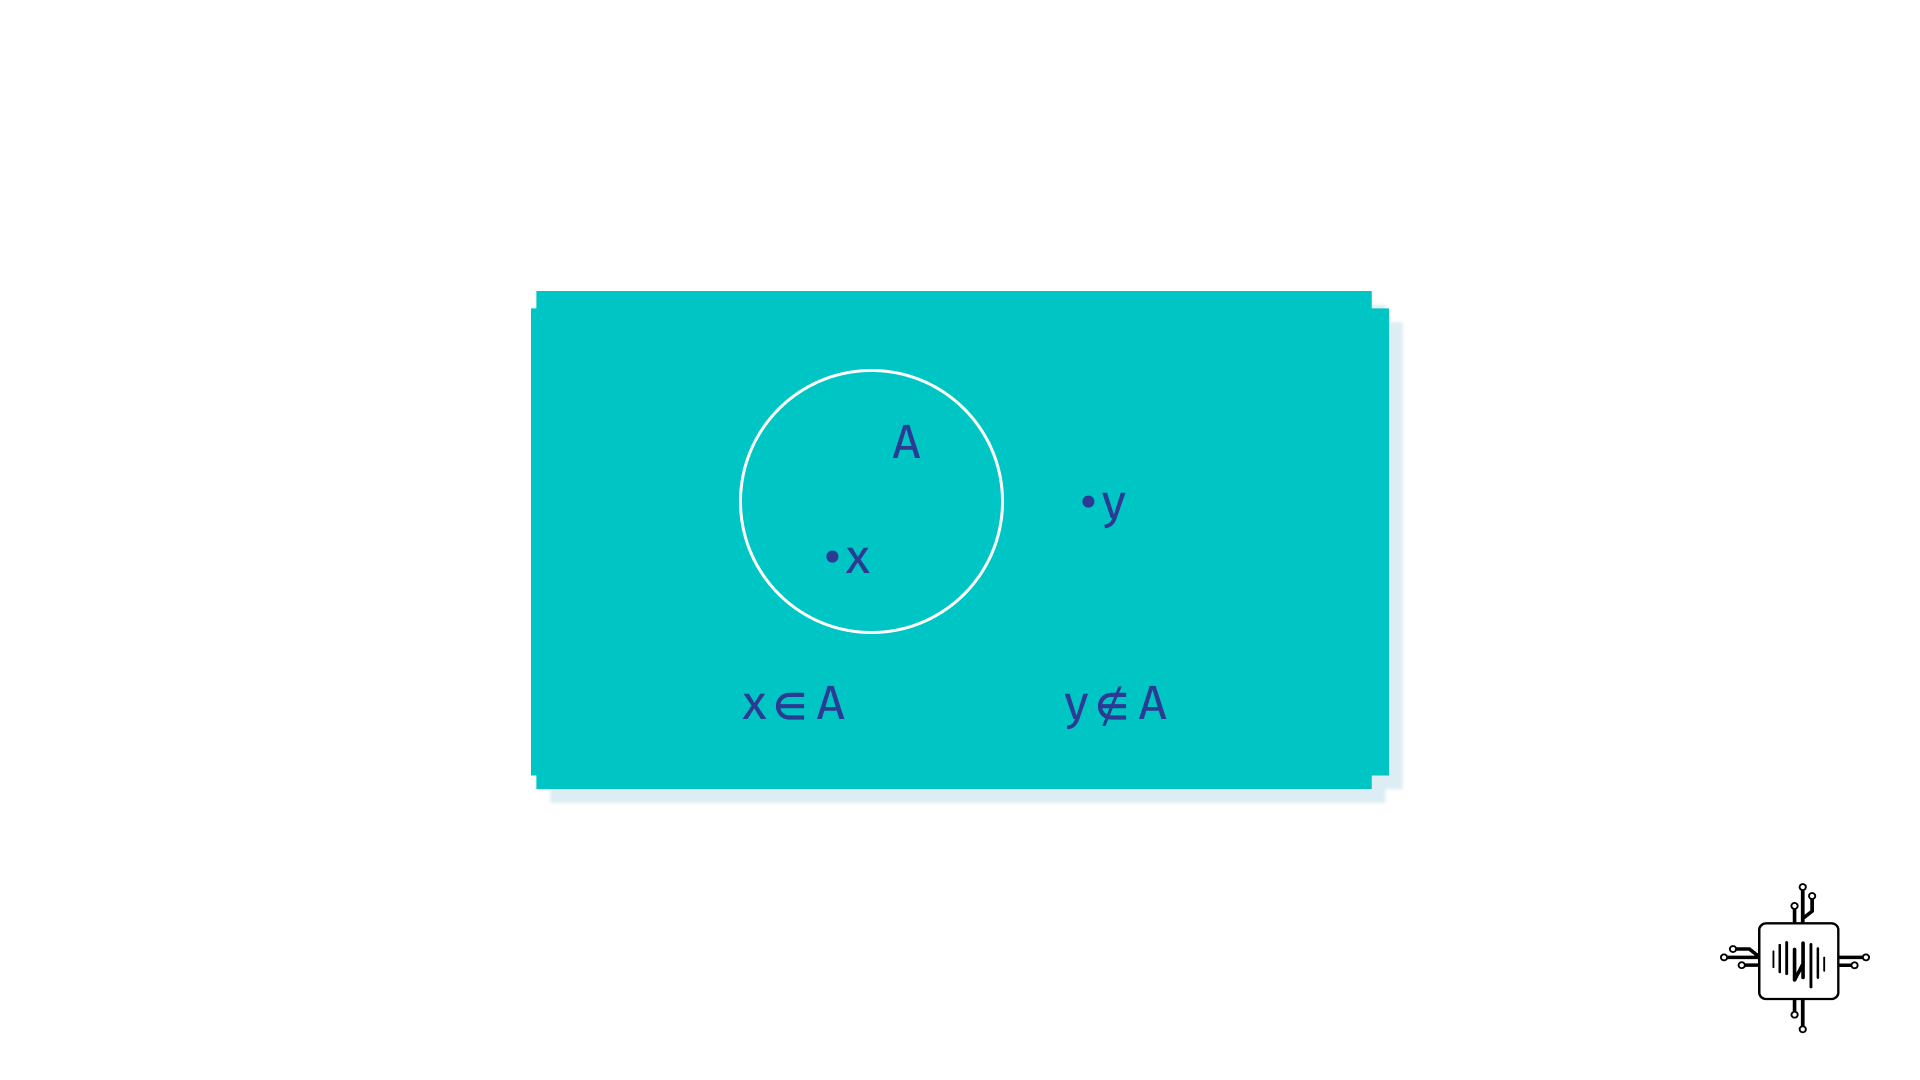

Для проверки, принадлежит элемент множеству или нет, есть две операции: `in` и `not in`.

Результат их логический --- правда или ложь, а значит их можно использовать в циклах `while` и ветвлениях `if`:

In [ ]:
if "червяк" in animals:
    print("Червяк есть в этом множестве животных!")
elif "червяк" not in animals:
    print("Червяка в множестве нет...")
else:
    print("Третьего не дано. Этот print никогда не случится.")

Червяка в множестве нет...


## Сравнение множеств
В математике множество, все элементы которого содержатся в другом множестве, называется *подмножеством*, вложенным в это множество.


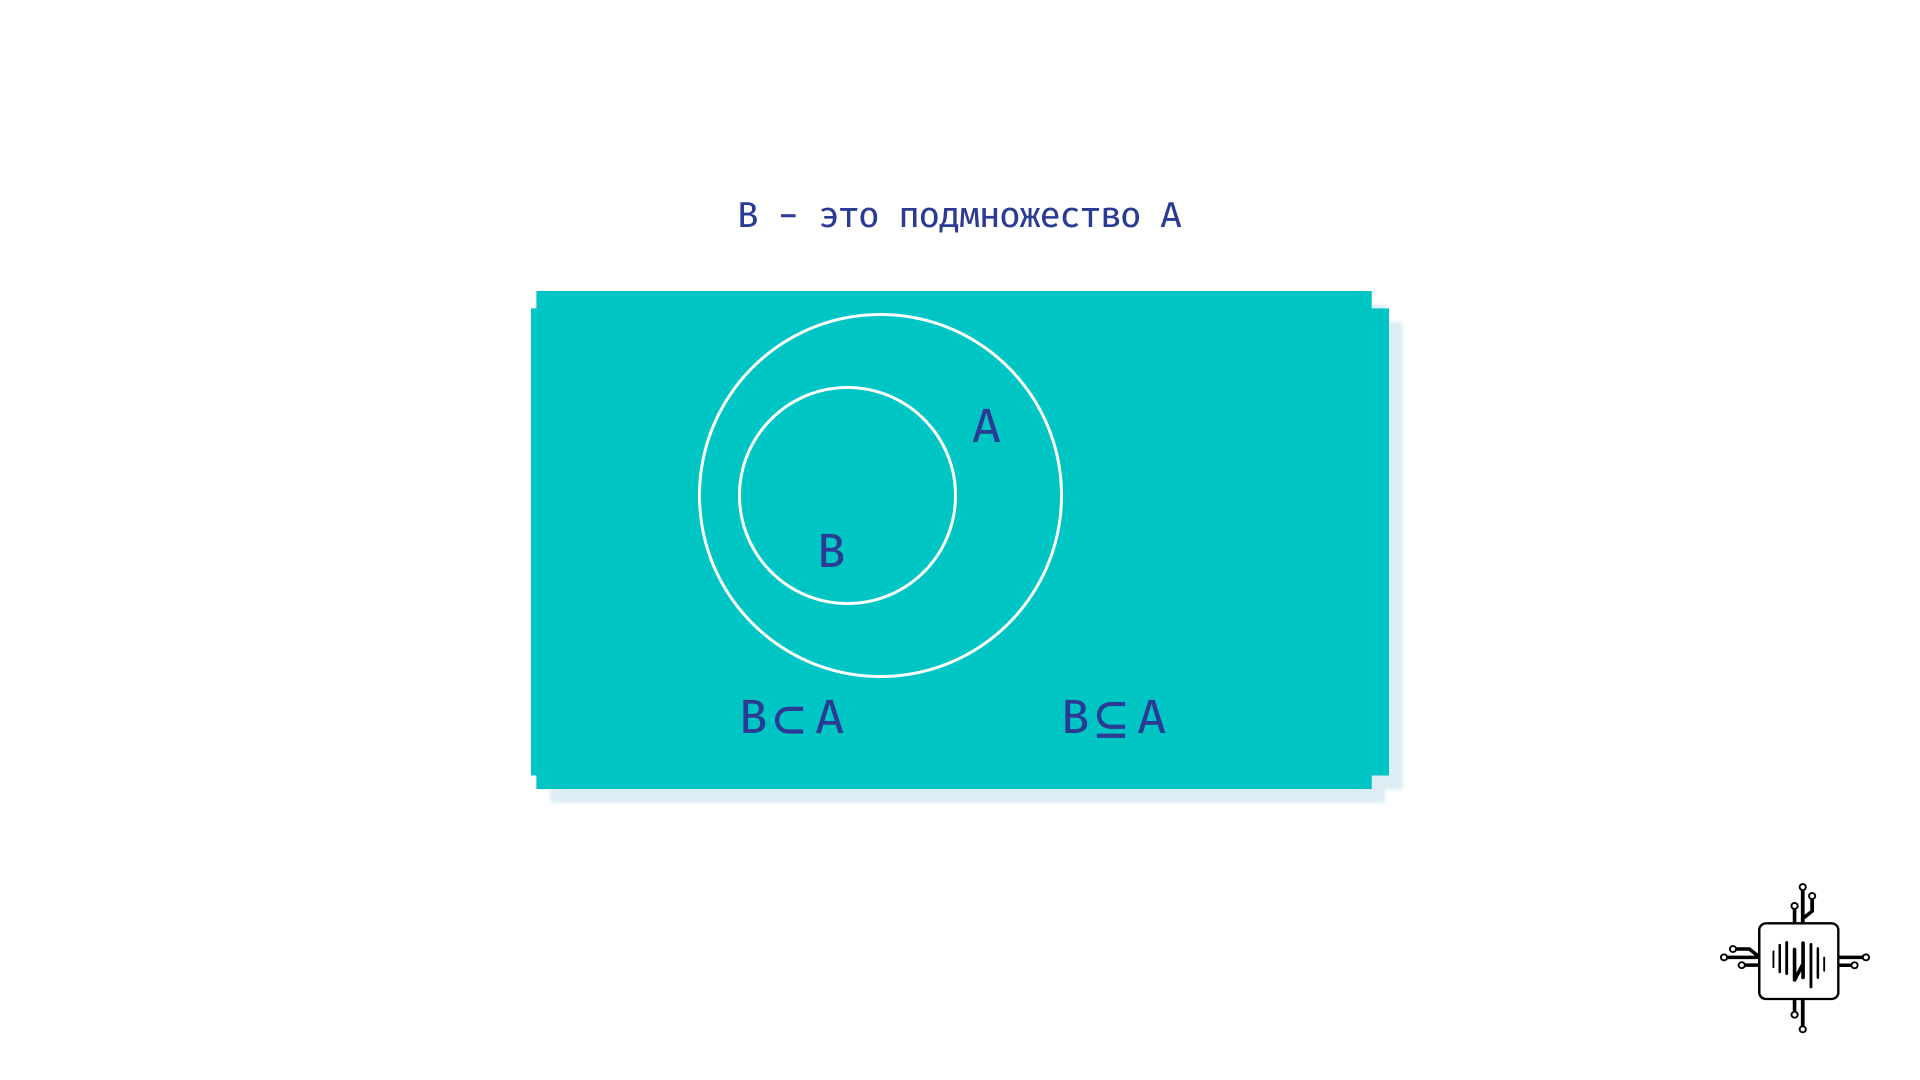

В Python для проверки *отношения вложенности* между множествами есть *оператор сравнения* `<=`.

In [ ]:
animals = {"корова", "собака", "кошка", "гусь", "курица", "тигр", "пчела", "оса", "щука"}
domestic_animals = {"корова", "собака", "кошка", "гусь", "курица", "пчела"}
mammals = {"корова", "собака", "кошка", "тигр"}

if mammals <= animals:
    print("Все млекопитающие являются животными.")
if animals >= domestic_animals:
    print("Все домашние животные являются животными.")

Все млекопитающие являются животными.
Все домашние животные являются животными.


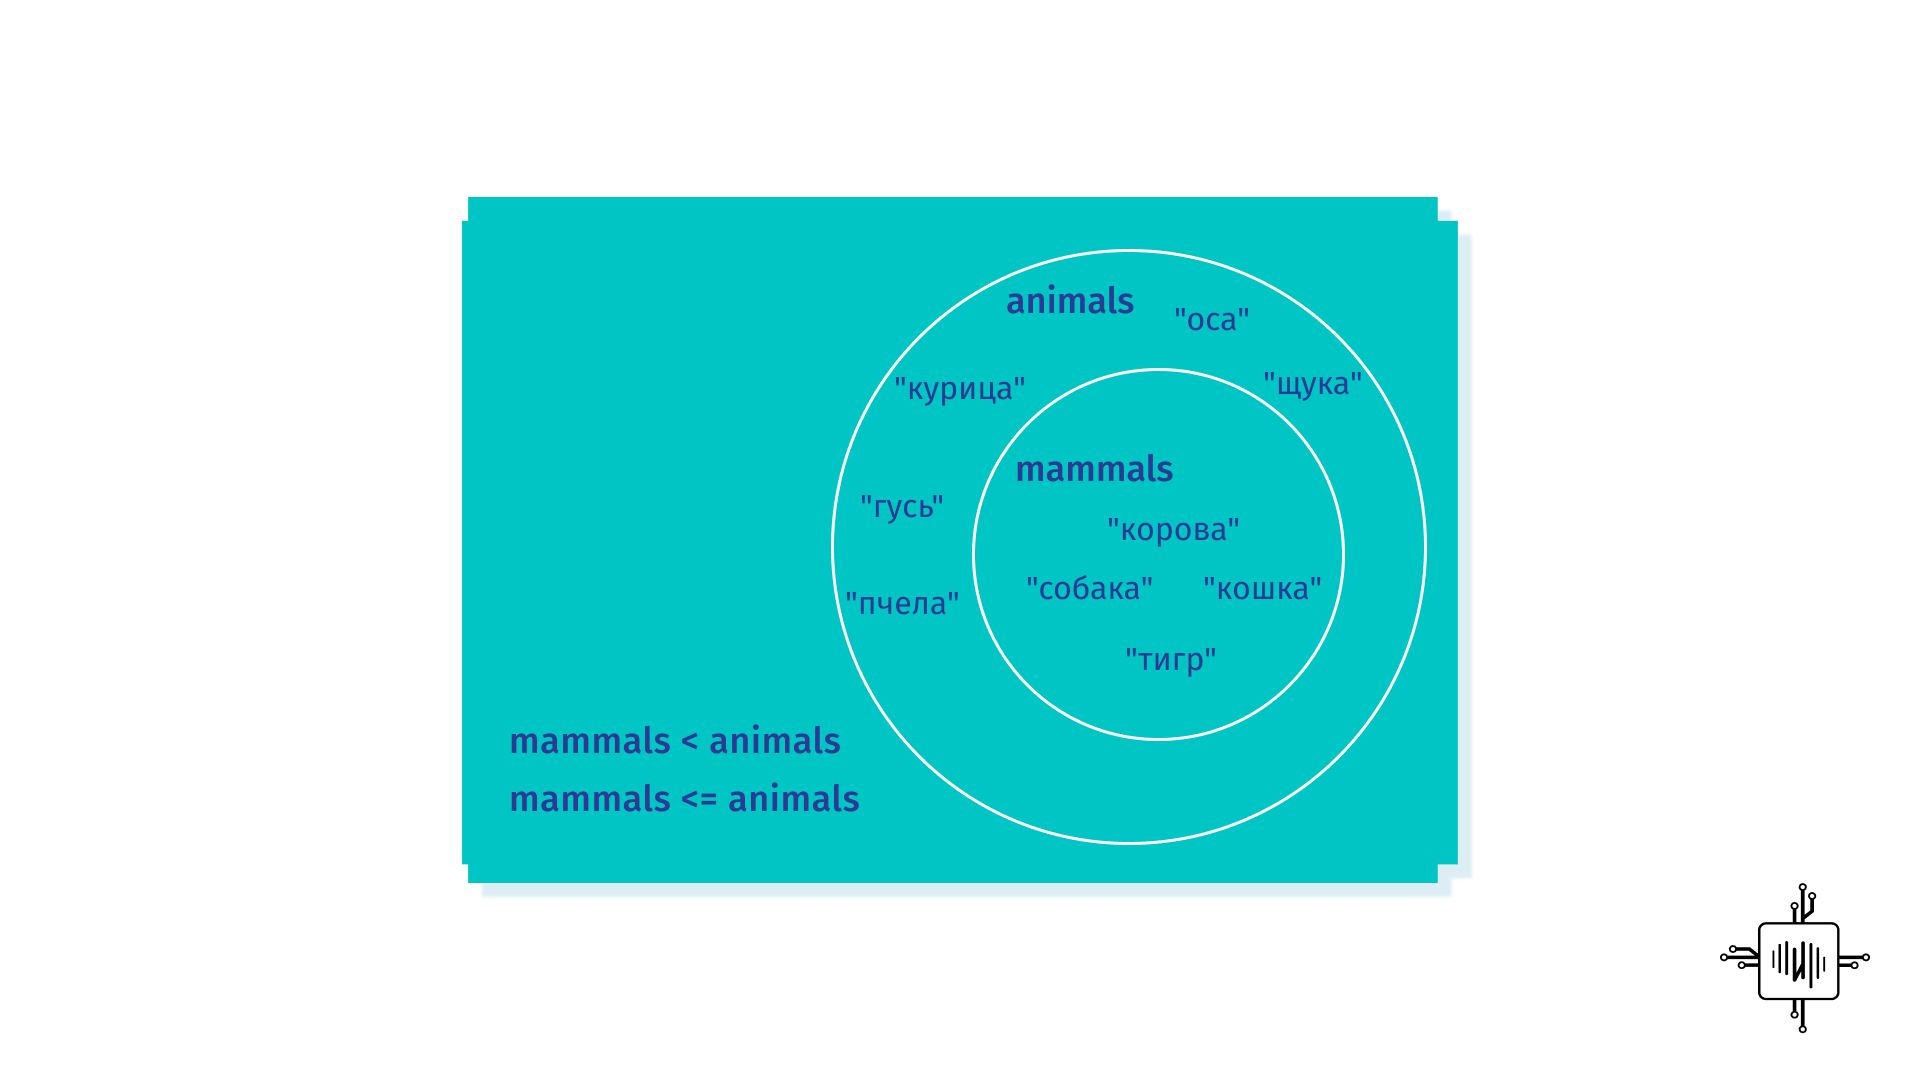

Множества, в которых все элементы совпадают, называются *эквивалентными множествами*. При этом порядок не важен, так как порядка в множестве как бы и нет. Для сравнения на эквивалентность используются операторы "равно" `==` и "не равно" `!=`.

In [ ]:
if domestic_animals == mammals:
    print("'Домашние животные' и 'млекопитающие' означают один и тот же набор животных.")
if domestic_animals != mammals:
    print("'Домашние животные' и 'млекопитающие' не совпадают по набору животных.")

'Домашние животные' и 'млекопитающие' не совпадают по набору животных.


Также есть операторы `>` и `<`, которые означают вложенность без эквивалентности:

In [ ]:
if animals > domestic_animals:
    print("Все домашние животные являются животными. При этом животных больше, чем домашних животных.")

Все домашние животные являются животными. При этом животных больше, чем домашних животных.


Настал момент "сломать биологу мозг":

In [ ]:
if mammals > domestic_animals:
    print('Млекопитающие - строгое надмножество домашних.')
elif mammals < domestic_animals:
    print('Млекопитающие - строгое подмножество домашних.')
elif mammals == domestic_animals:
    print('Млекопитающие и домашние животные - эквивалентные множества.')
else:
    print("Казалось бы, такого не может быть...")

Казалось бы, такого не может быть...


В чём дело?! Разве может быть, что один объект не больше, не меньше и не равен другому?
С числами, строками и многими другими элементами так просто не может быть... А с множествами может!

Помните, когда мы говорили про сортировку, упоминалось *отношение порядка*? Так вот, для множеств в Python его нет, и *сортировать список множеств бесполезно*.

## Пересечение множеств
Множество элементов, которые одновременно находятся в первом и втором множествах, в математике называется *пересечением множеств*.

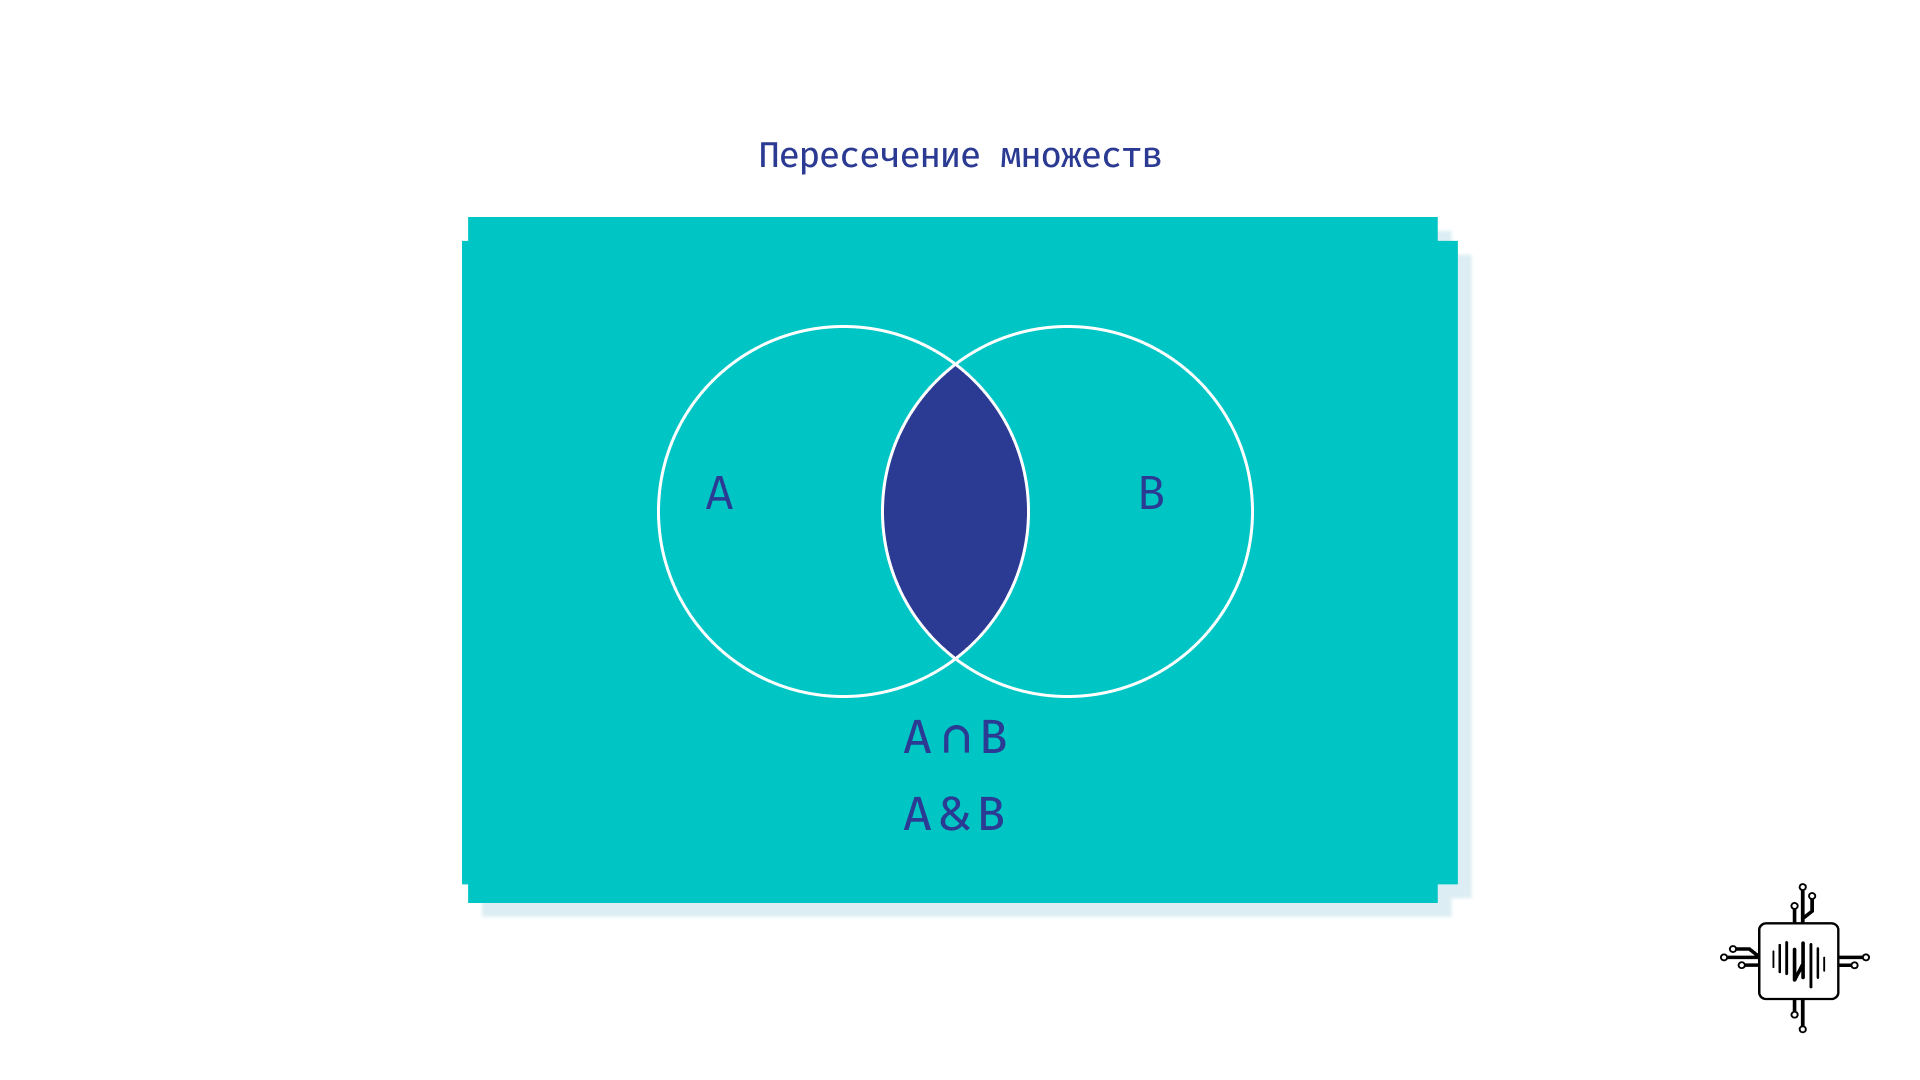

В Python операция *пересечение множеств* реализована при помощи метода `intersection`, но также можно пользоваться оператором `&`:

In [ ]:
mammals.intersection(domestic_animals)

{'корова', 'кошка', 'собака'}

In [ ]:
mammals & domestic_animals

{'корова', 'кошка', 'собака'}

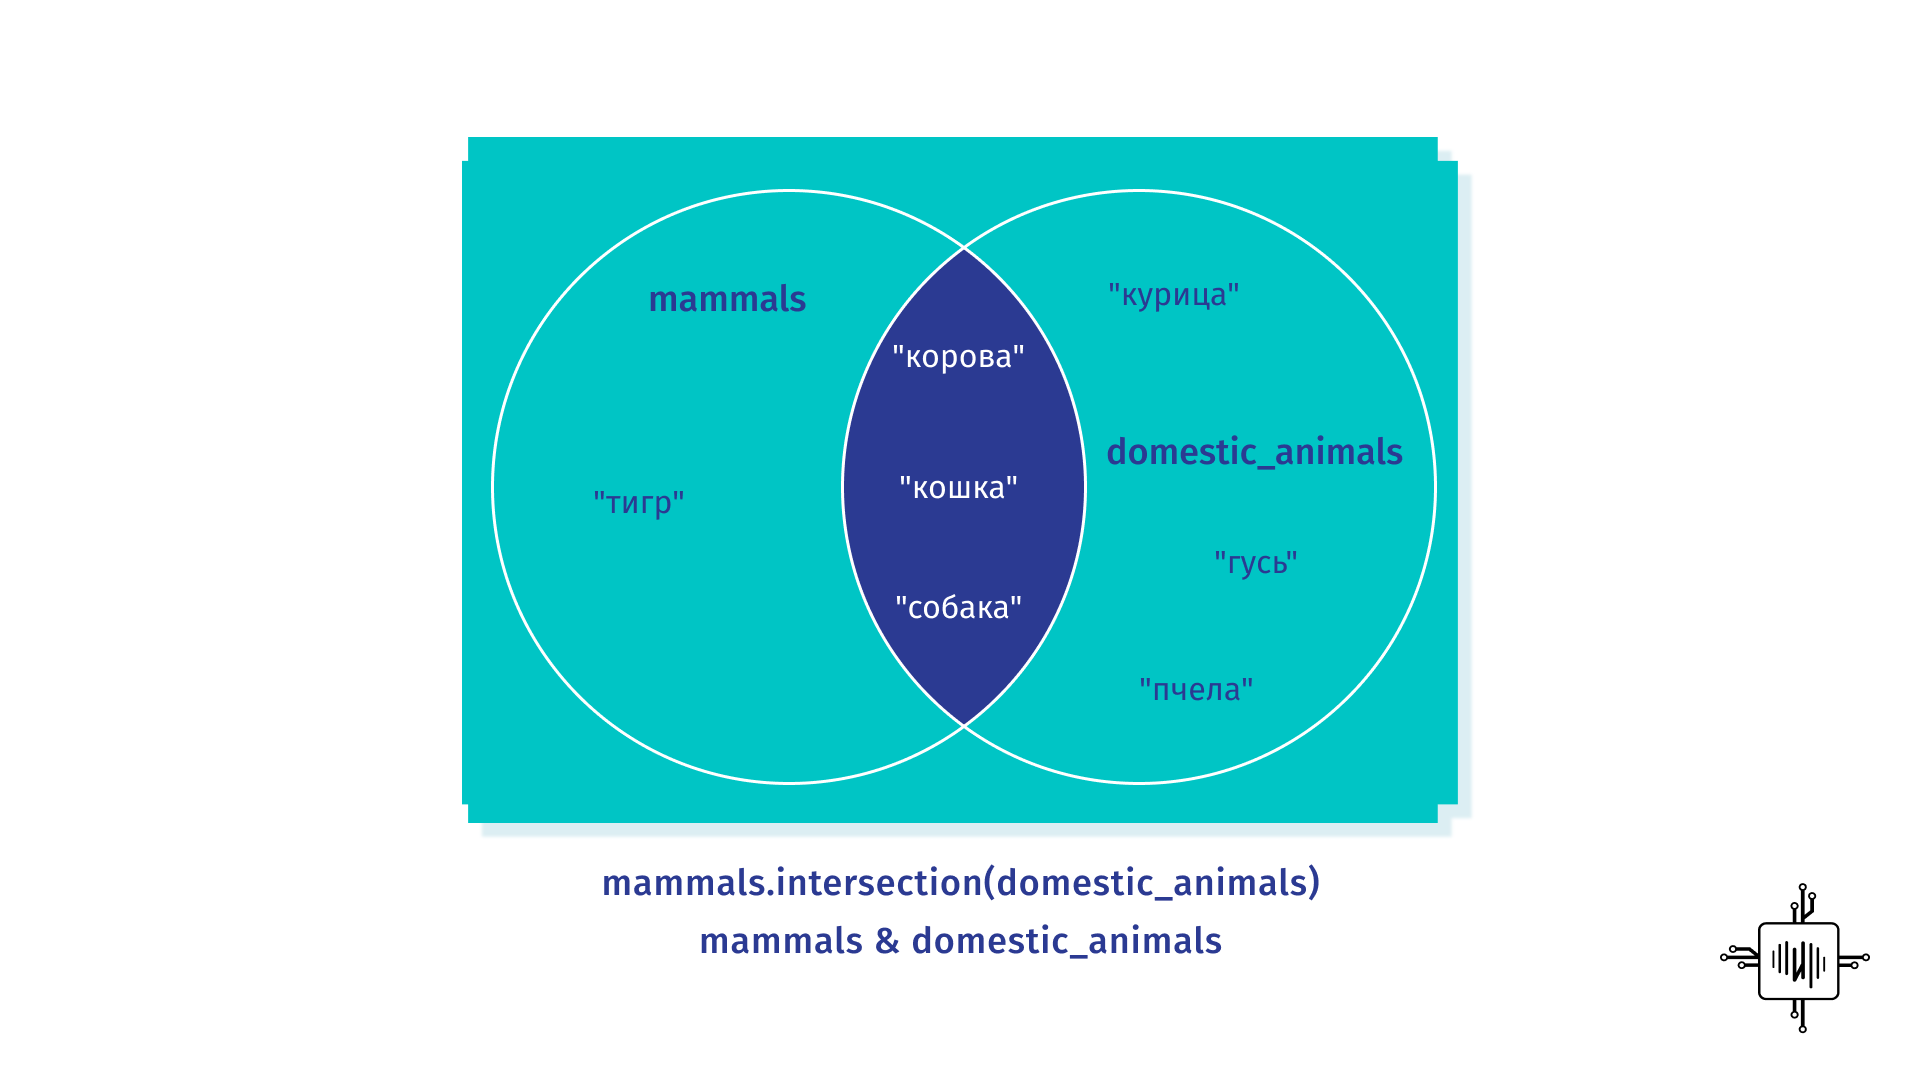

## Объединение множеств
Множество элементов, которые находятся хотя бы в одном из двух множеств, в математике называется *объединением множеств*.

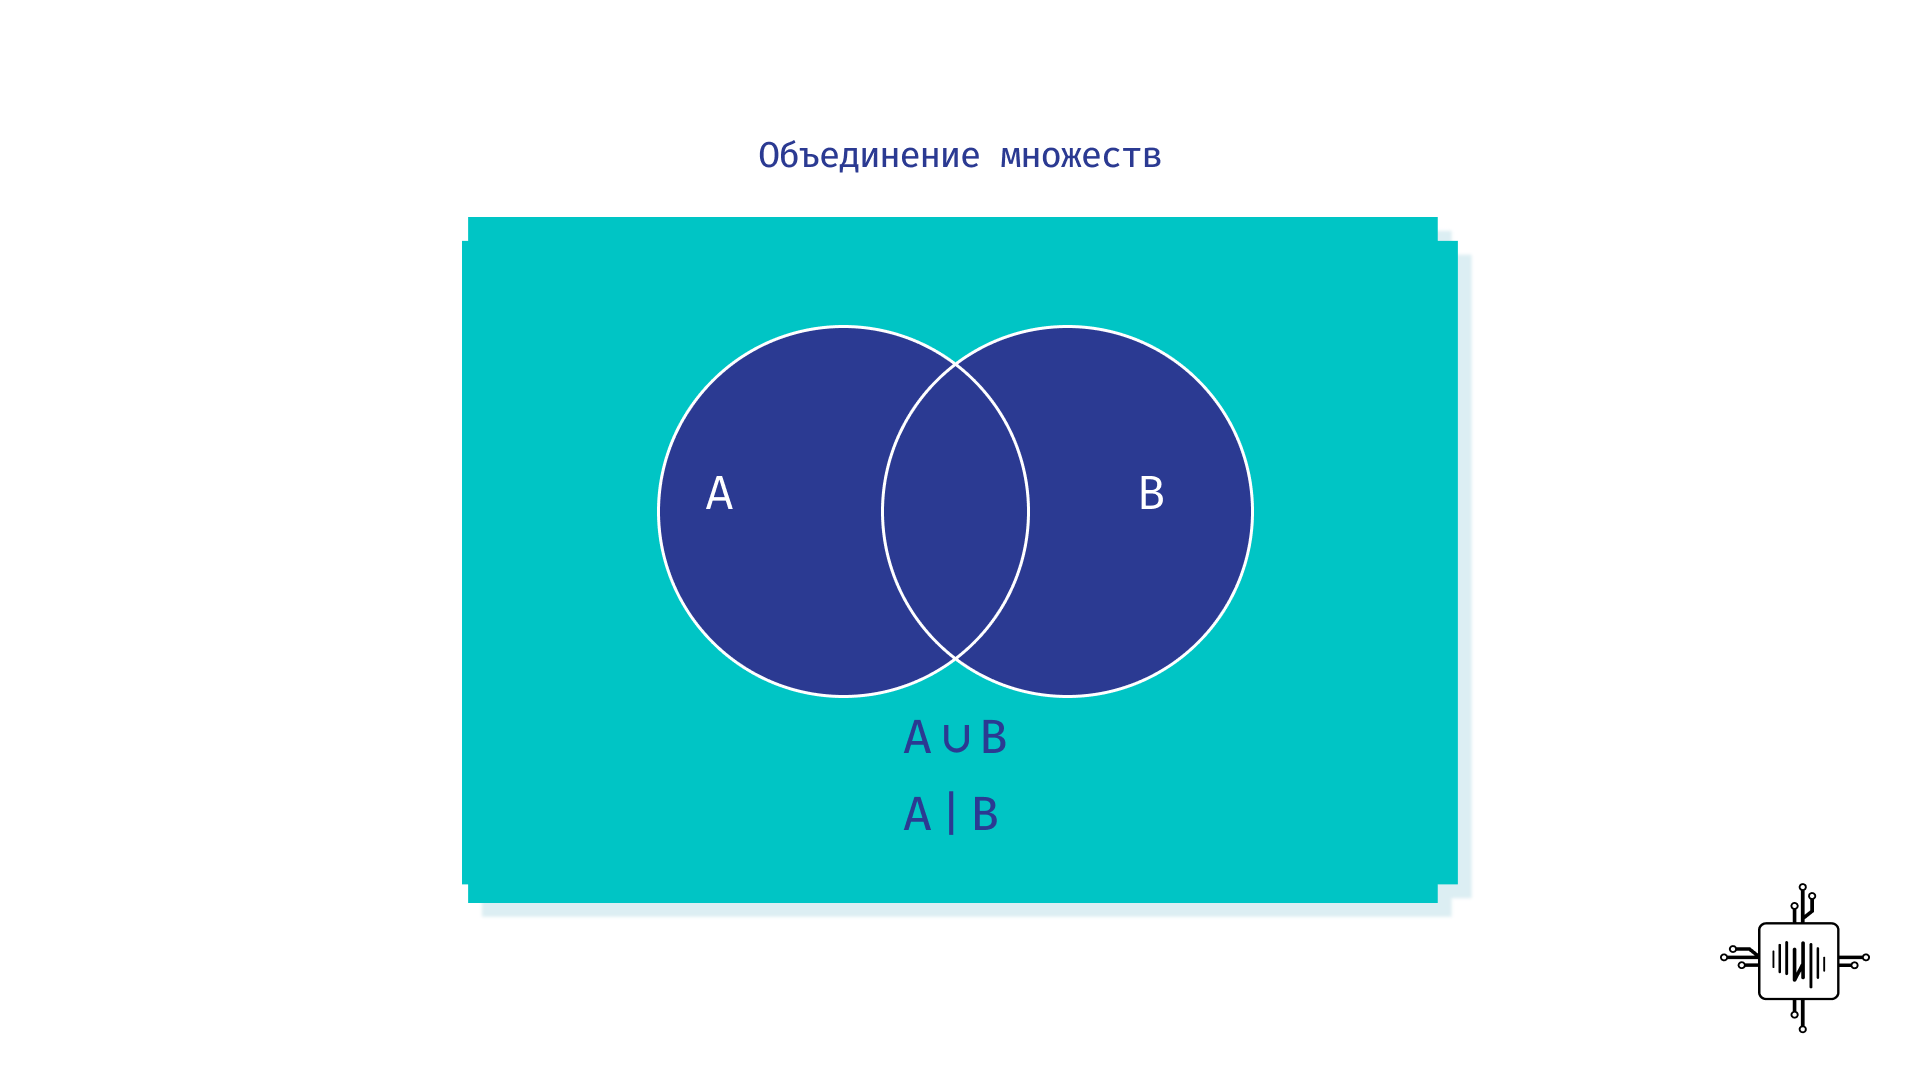

В Python операция *объединение множеств* реализована при помощи метода `union`, но также можно пользоваться оператором `|`:

In [ ]:
mammals.union(domestic_animals)

{'гусь', 'корова', 'кошка', 'курица', 'пчела', 'собака', 'тигр'}

In [ ]:
mammals | domestic_animals

{'гусь', 'корова', 'кошка', 'курица', 'пчела', 'собака', 'тигр'}

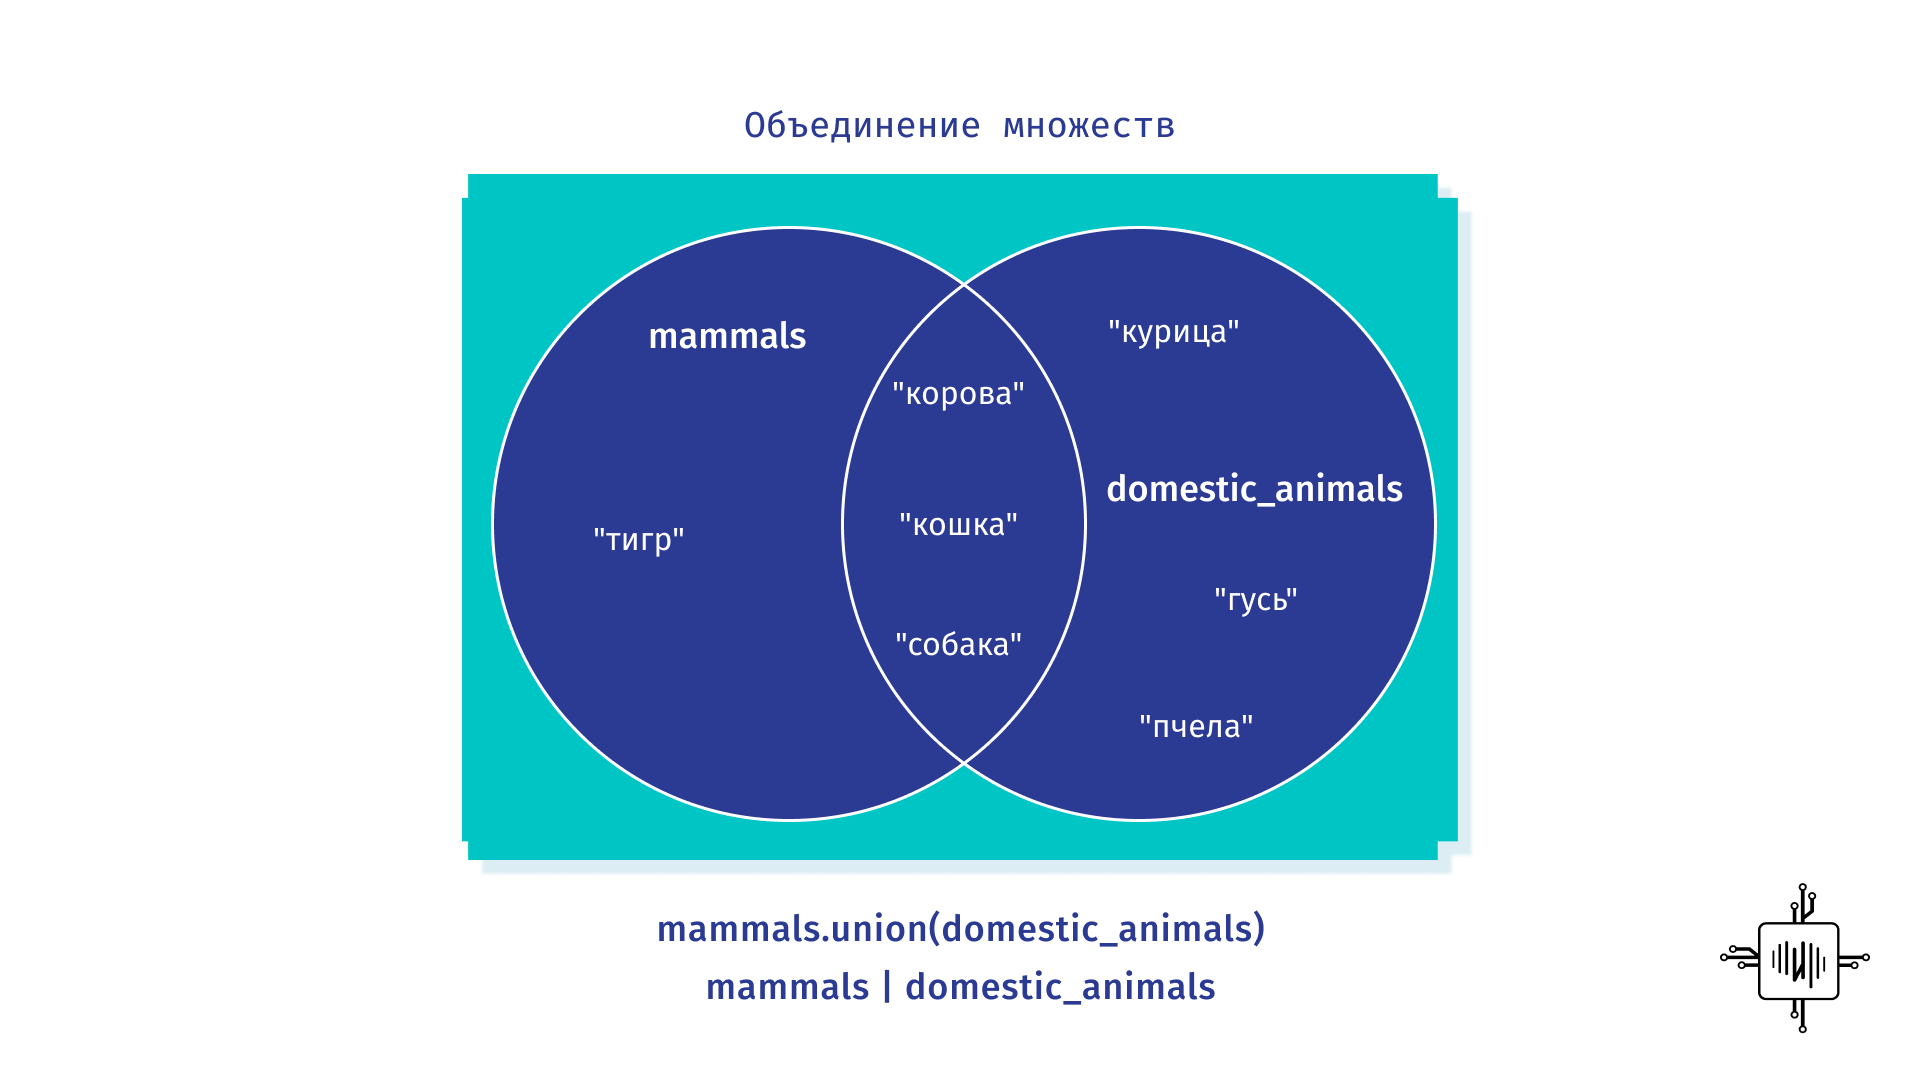

## Разность множеств
Также есть возможность *вычитать множества*, понимая под этим множество элементов первого множества, которые не являются при этом элементами второго множества.

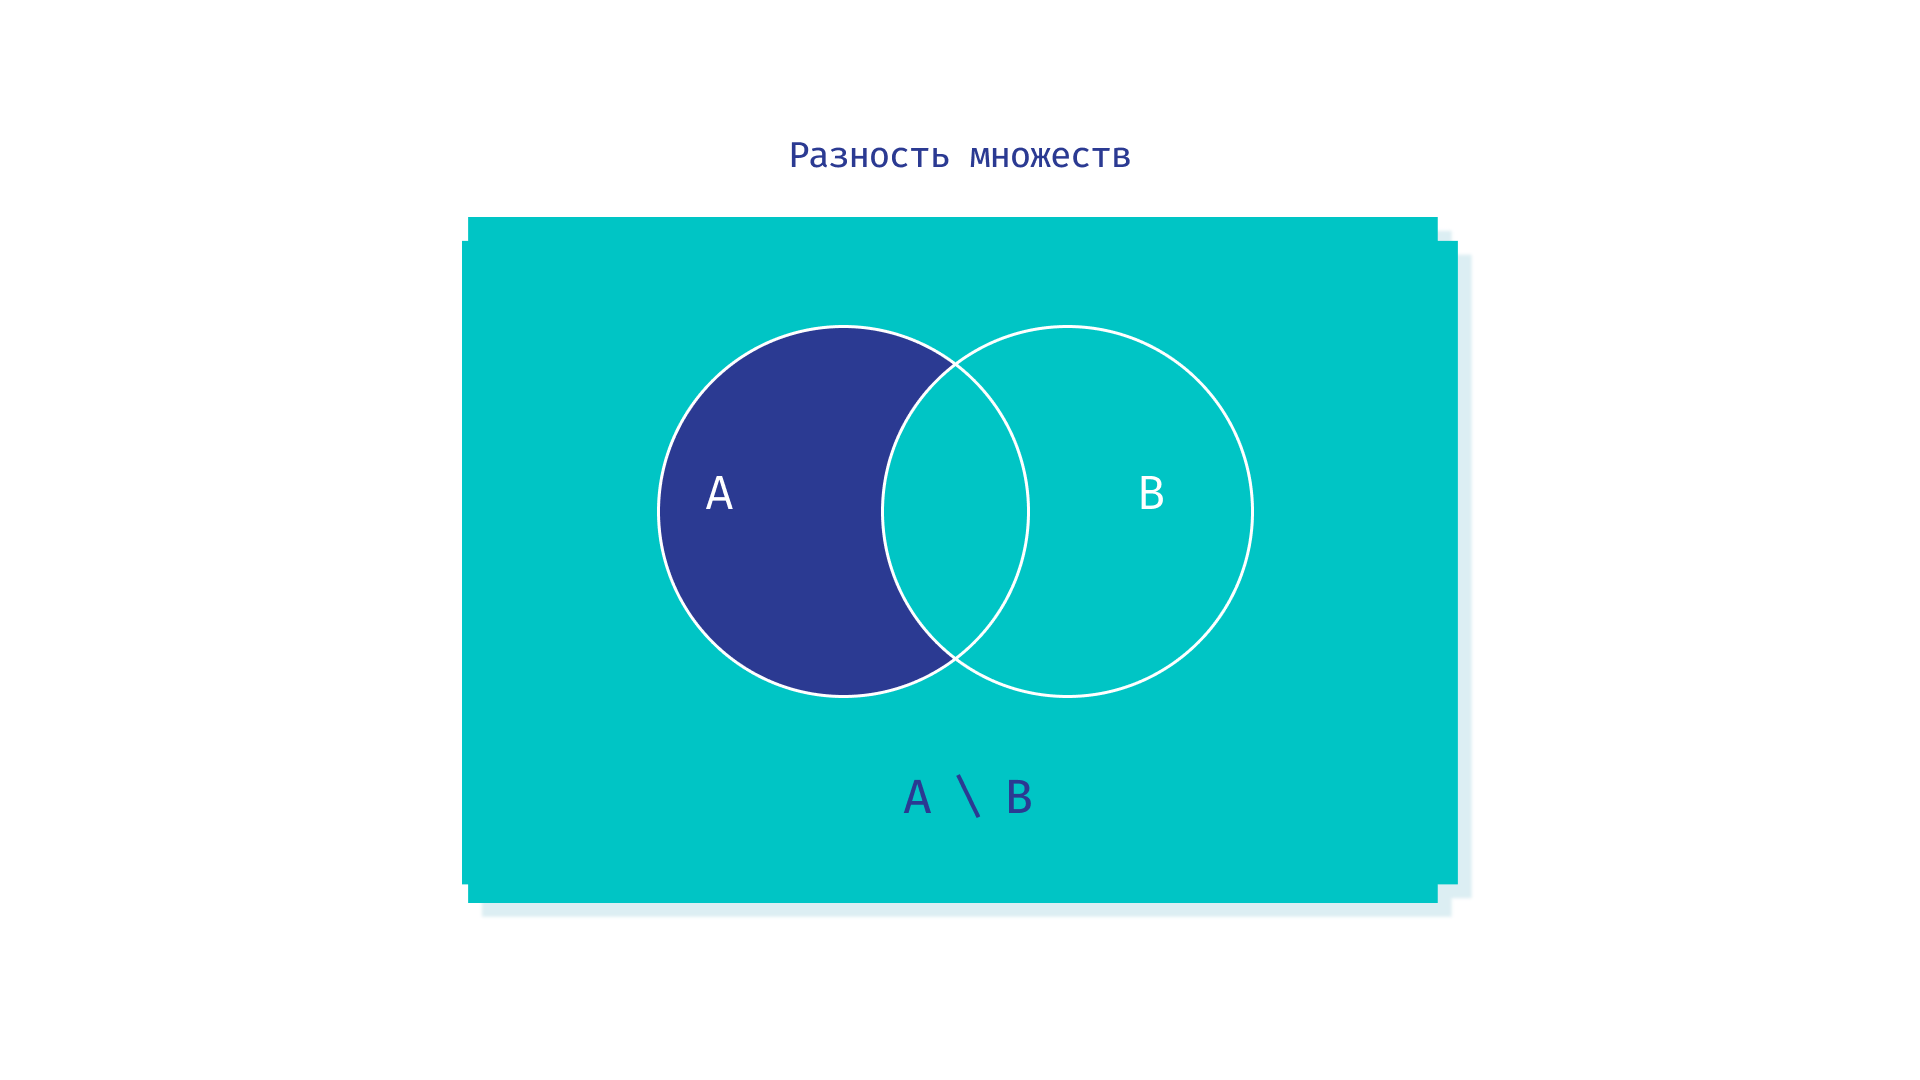

Операции объединения и пересечения симметричны, т.е. не важно какое множество слева, а какое справа.
В случае разности множеств это принципиально важно:

In [ ]:
mammals - domestic_animals

{'тигр'}

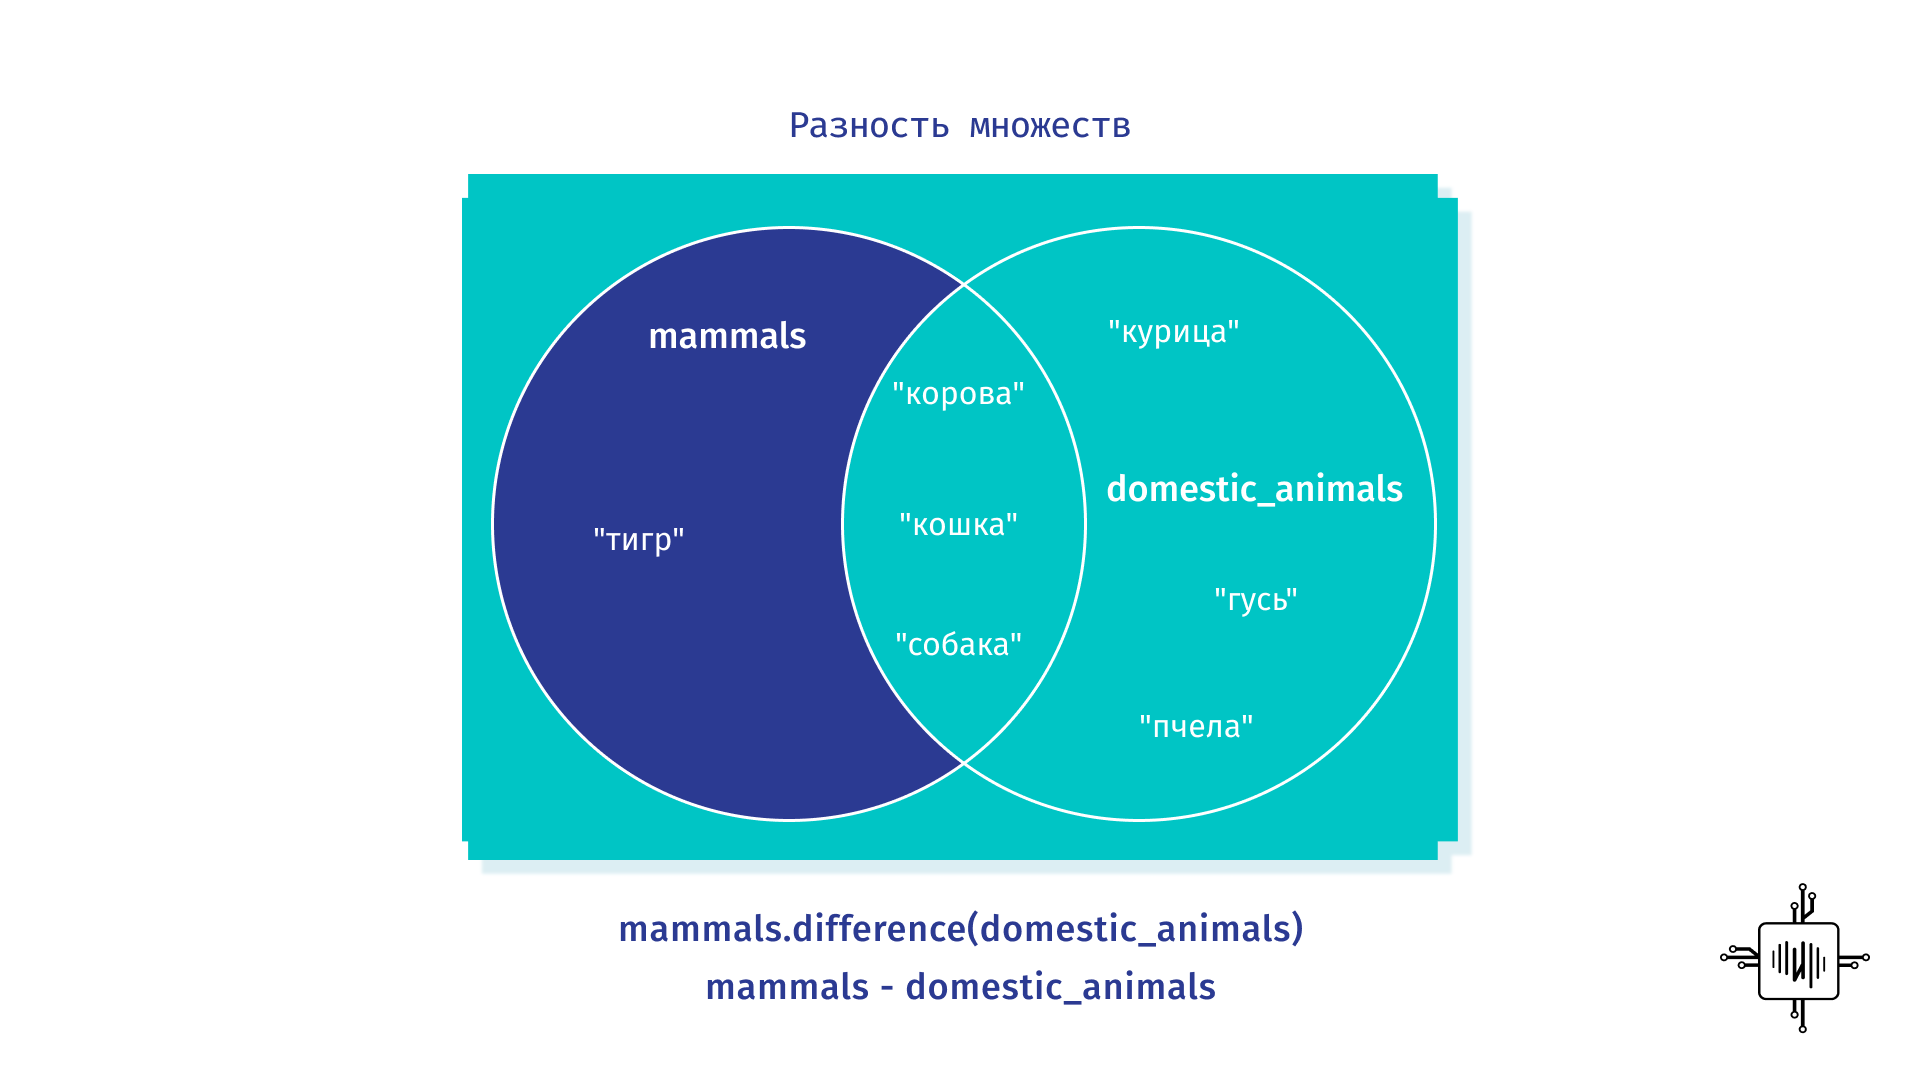

In [ ]:
domestic_animals - mammals

{'гусь', 'курица', 'пчела'}

При желании можно пользоваться не оператором `-`, а методом `difference`:

In [ ]:
domestic_animals.difference(mammals)

{'гусь', 'курица', 'пчела'}

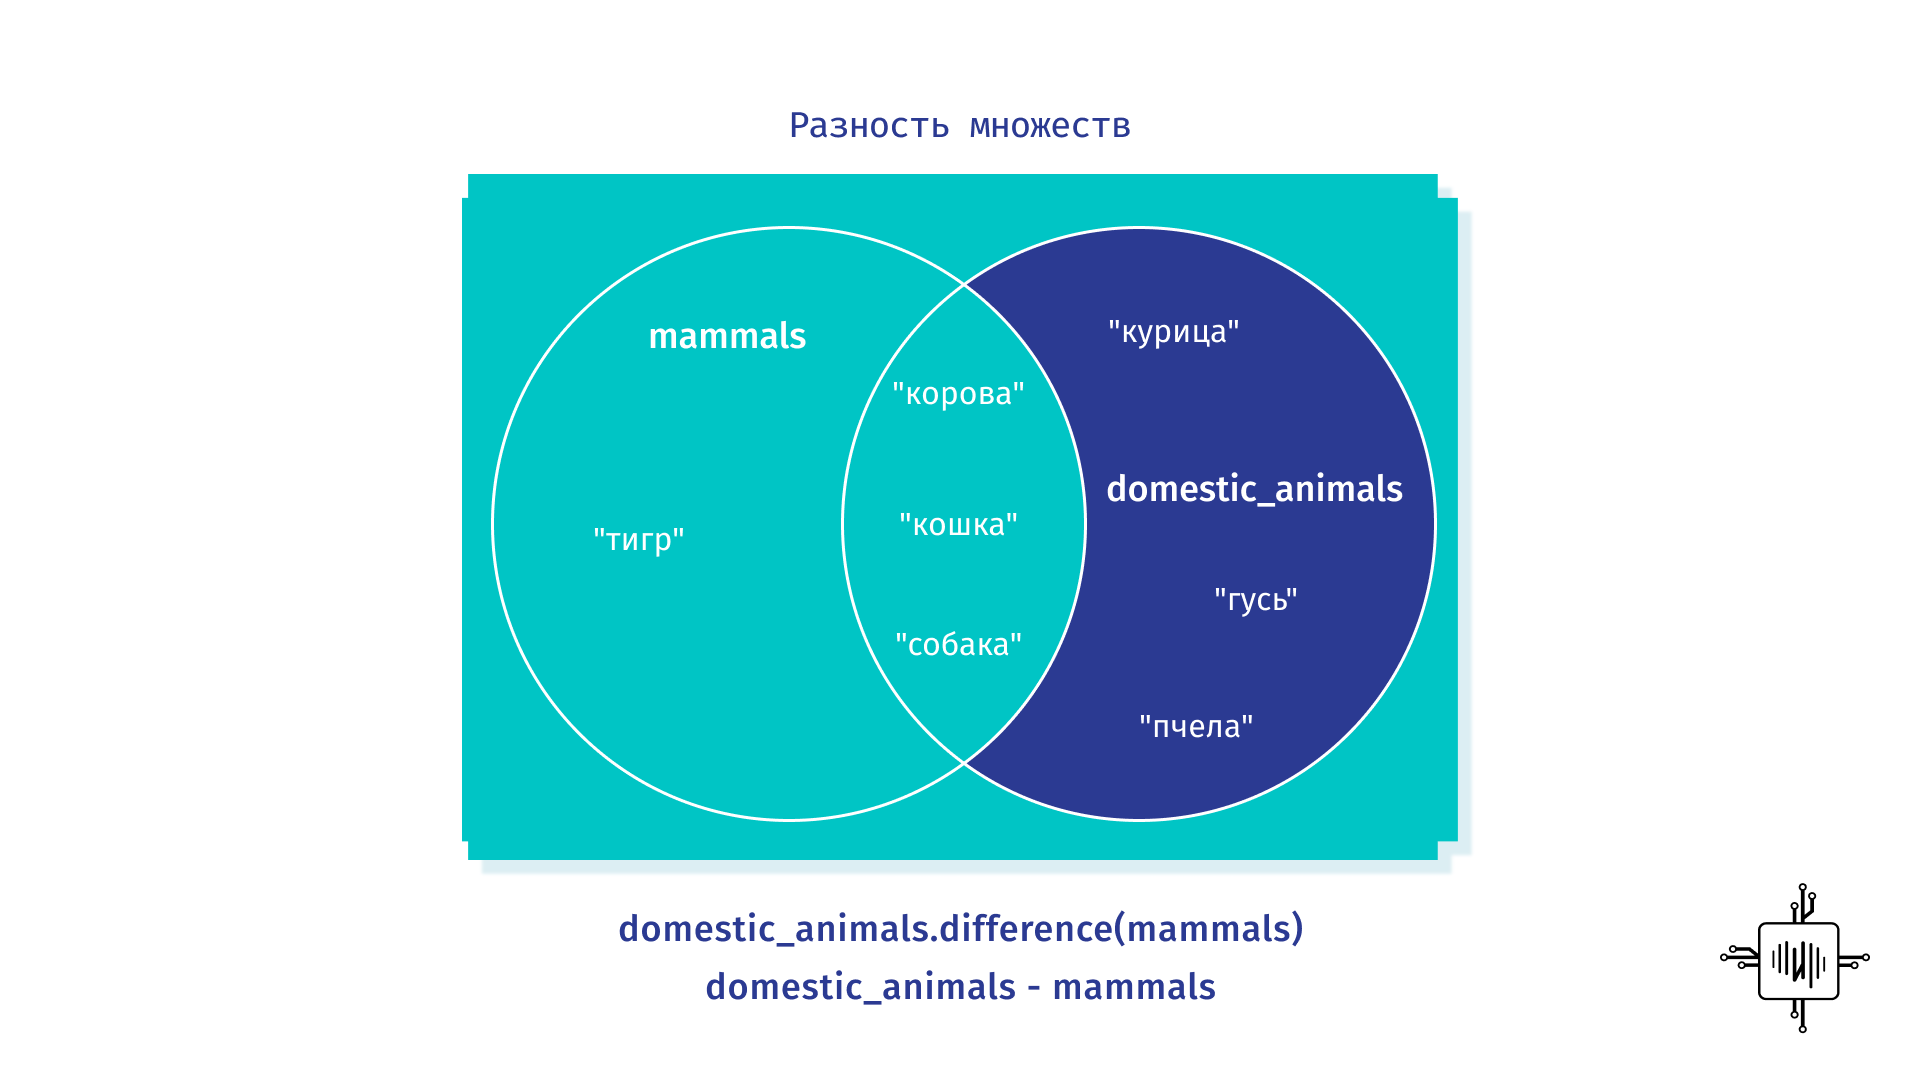

В математике есть ещё одна интересная операция с двумя множествами — *симметрическая разность*. По сути это объединение двух множеств за исключением их пересечения. Ещё раз: из объединения исключаются те элементы, которые принадлежат сразу двум множествам.

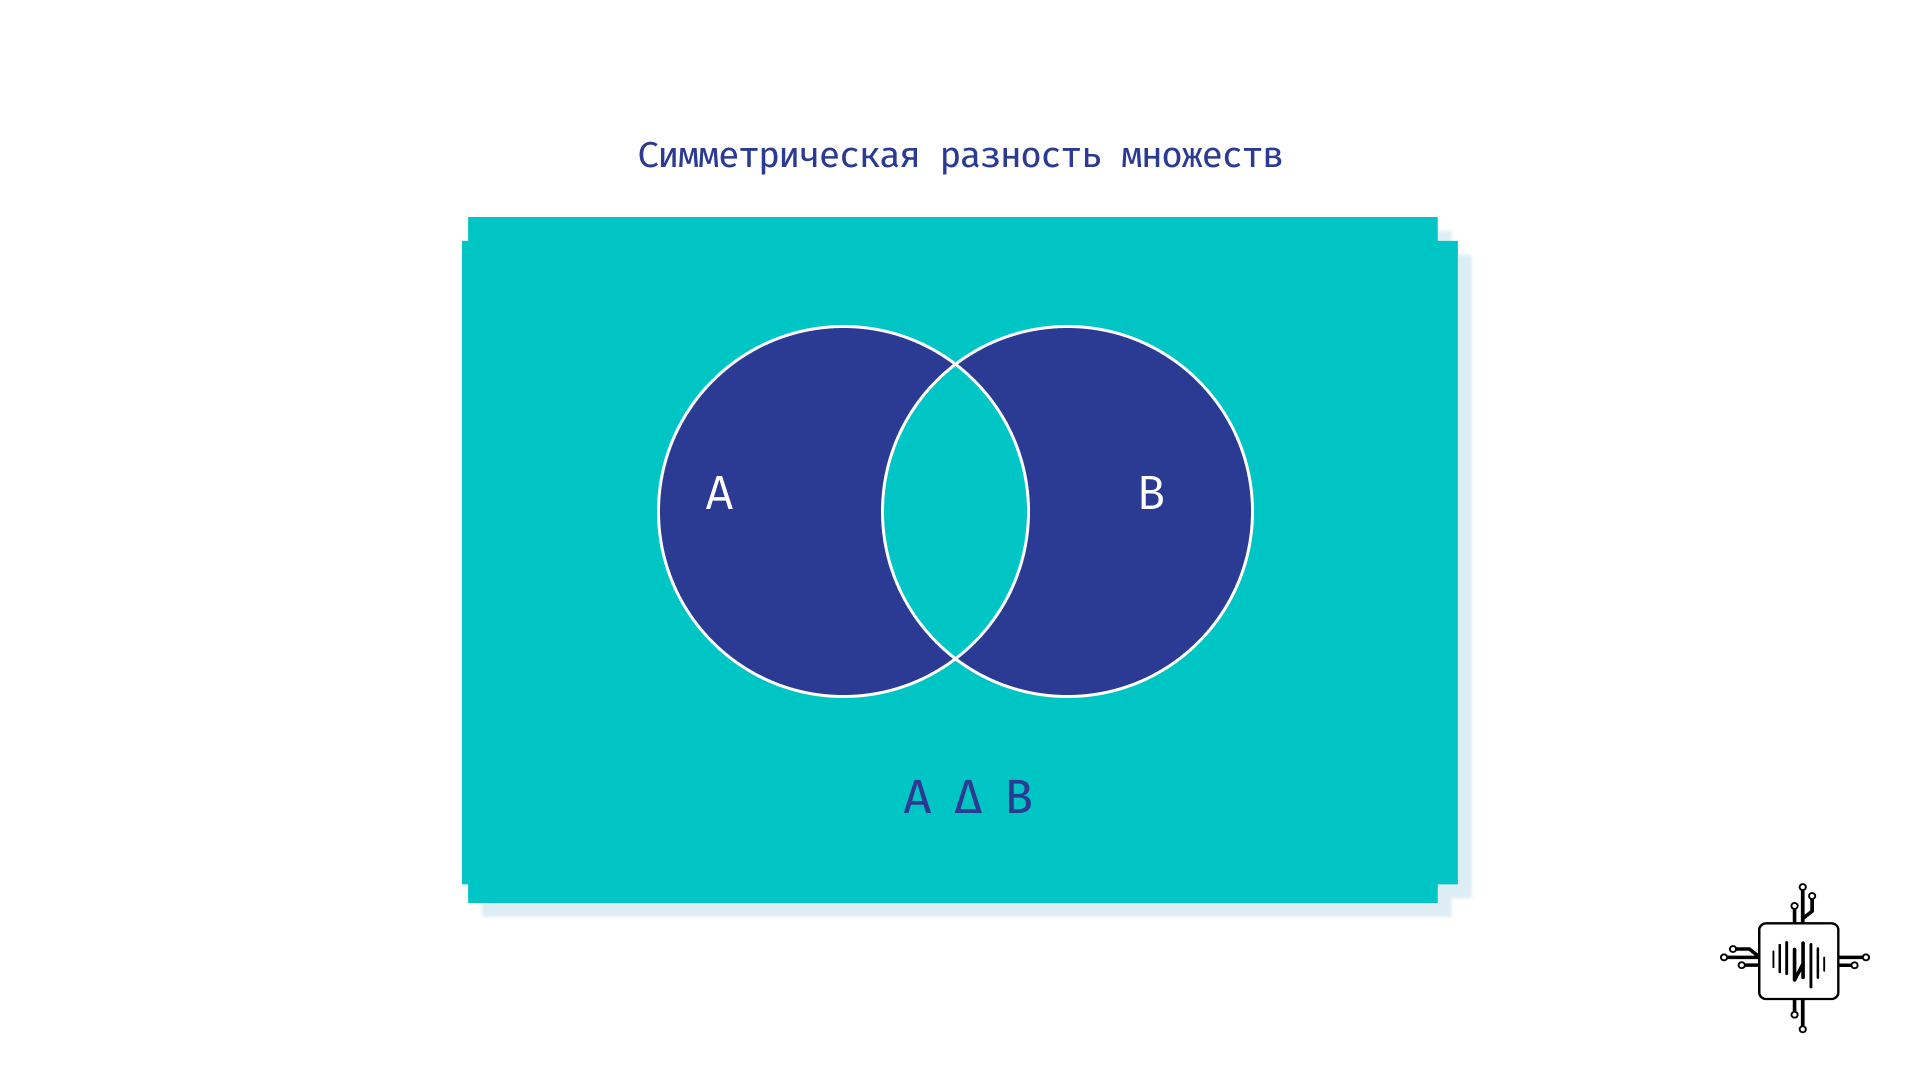

В Python эта операция вызывается методом множества `symmetric_difference` или оператором `^`:

In [ ]:
mammals.symmetric_difference(domestic_animals)

{'гусь', 'курица', 'пчела', 'тигр'}

In [ ]:
mammals ^ domestic_animals

{'гусь', 'курица', 'пчела', 'тигр'}

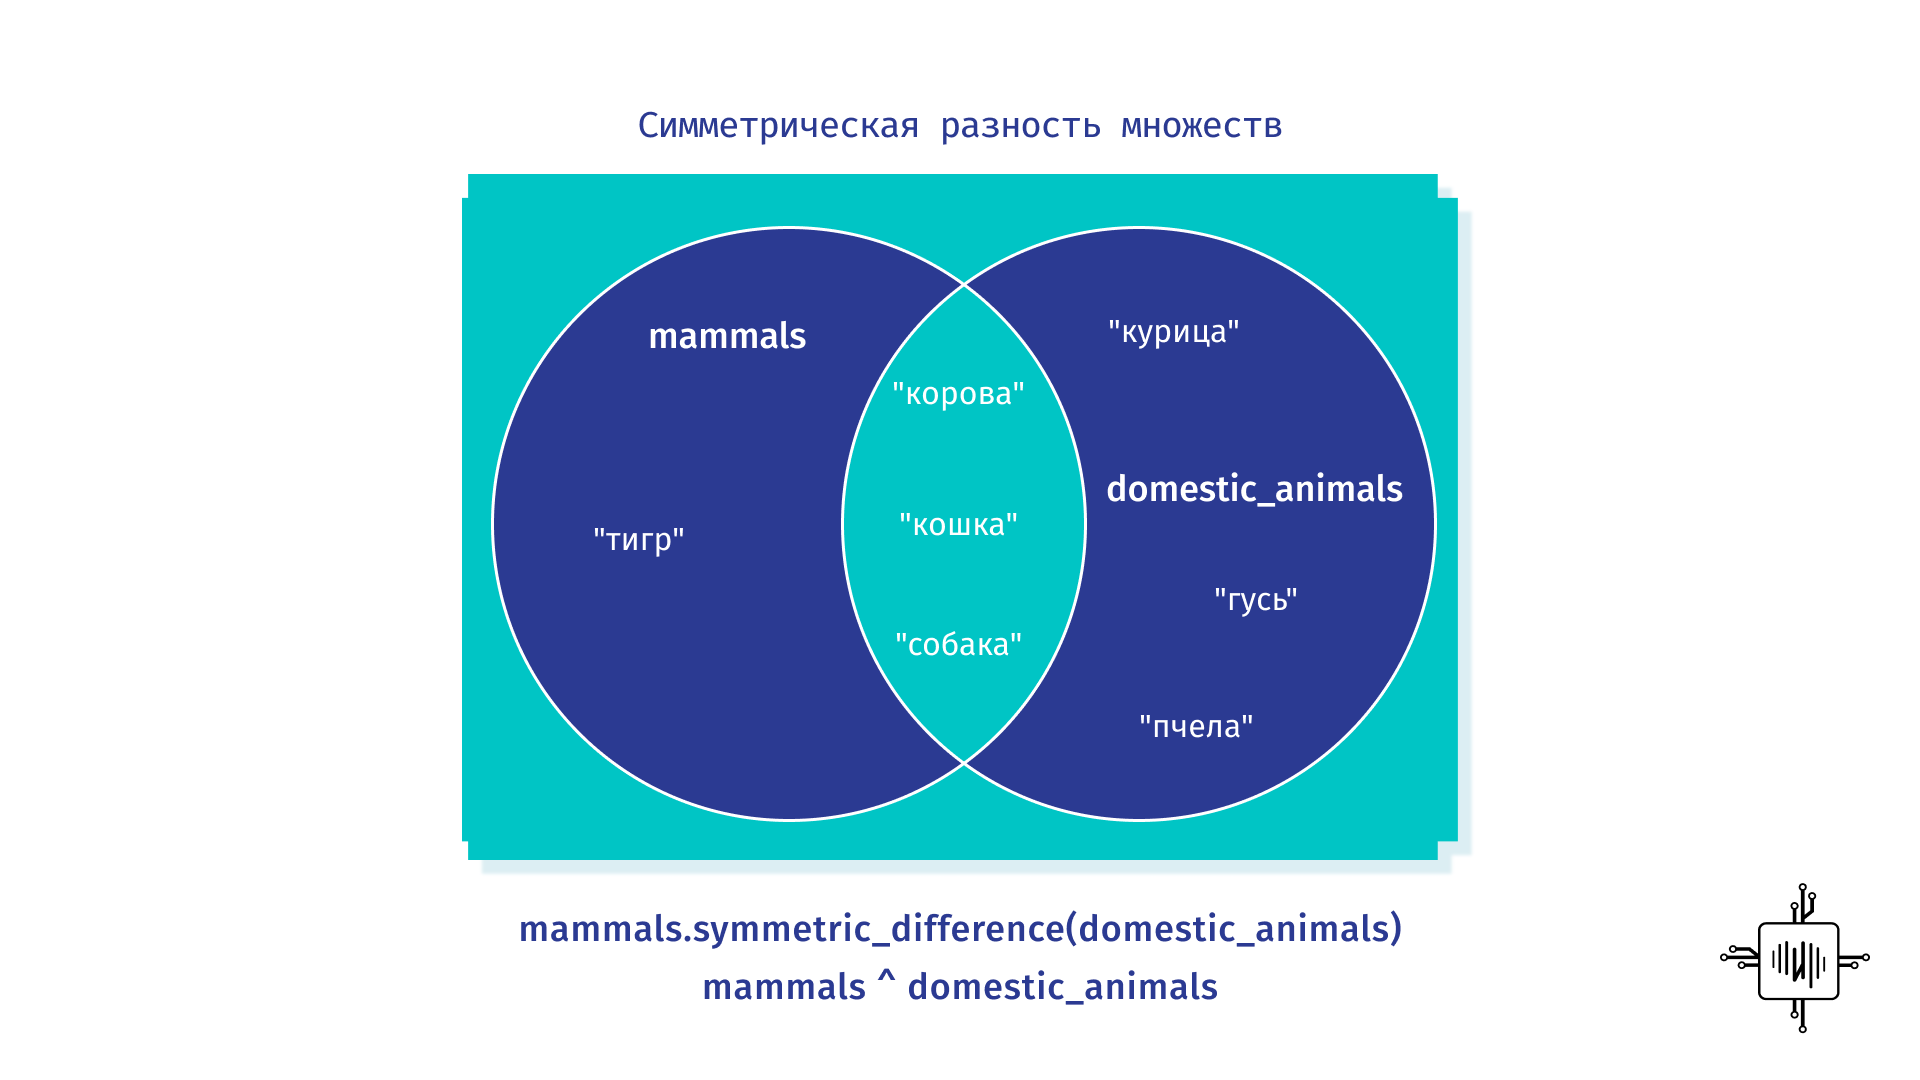

## Set comprehensions: генерация множеств
Так же, как и списки, множества можно генерировать на основании итерируемых объектов.

In [ ]:
inverted_animals_names = {name[::-1] for name in animals}
print(inverted_animals_names)

{'асо', 'ргит', 'ьсуг', 'ацирук', 'акшок', 'акущ', 'алечп', 'акабос', 'аворок'}


## Добавление элементов в множество и удаление их из него
Надо заметить, что все вышеперечисленные операции *не изменяют старые, а создают новое множество*.

Тем не менее, в Python множество --- это изменяемый объект. В него можно добавлять элементы и удалять их, причём делать это как с одним значением, так и с целым набором.

In [ ]:
my_zoo = {"корова", "собака", "курица", "тигр", "пчела", "щука"}
print(id(my_zoo), my_zoo)
animals.add('мамонт')
print(id(my_zoo), my_zoo)

140128965409920 {'собака', 'щука', 'тигр', 'пчела', 'курица', 'корова'}
140128965409920 {'собака', 'щука', 'тигр', 'мамонт', 'пчела', 'курица', 'корова'}


In [ ]:
my_zoo = {"корова", "собака", "курица", "тигр", "пчела", "щука"}
print(id(my_zoo), my_zoo)
some_new_animals = ["каракатица", "осьминог", "камбала", "щука"]
my_zoo.update(some_new_animals)
print(id(my_zoo), my_zoo)

140128965409696 {'собака', 'щука', 'тигр', 'пчела', 'курица', 'корова'}
140128965409696 {'собака', 'щука', 'каракатица', 'тигр', 'камбала', 'осьминог', 'пчела', 'курица', 'корова'}


Обратите внимание ещё раз, что "щука" не вошла в множество второй раз. Вообще добавление в множество уже имеющегося там элемента не приводит к ошибке, но и множество при этом не меняется. Учтите это.

### Удаление элементов
Удаление `remove` происходит с генерацией ошибки, если удаляемого элемента в множестве нет, и удалять нечего:

In [ ]:
my_zoo = {"корова", "собака", "курица", "тигр", "пчела", "щука"}
print(my_zoo)
my_zoo.remove("корова")
print(my_zoo)
my_zoo.remove("корова")  # <--- тут произойдёт ошибка
print(my_zoo)

{'собака', 'щука', 'тигр', 'пчела', 'курица', 'корова'}
{'собака', 'щука', 'тигр', 'пчела', 'курица'}


KeyError: 'корова'

А также молчаливое `discard`:

In [ ]:
my_zoo = {"корова", "собака", "курица", "тигр", "пчела", "щука"}
print(my_zoo)
my_zoo.discard("корова")
print(my_zoo)
my_zoo.discard("корова")  # <--- тут не произойдёт ничего
print(my_zoo)

{'собака', 'щука', 'тигр', 'пчела', 'курица', 'корова'}
{'собака', 'щука', 'тигр', 'пчела', 'курица'}
{'собака', 'щука', 'тигр', 'пчела', 'курица'}


# Тип dict. Словарь и операции с ним
**Словарь** похож на множество тем, что хранение в нём не упорядочено, а поиск происходит насколько возможно быстро. Однако хранятся в нём не элементы, а *пары (ключ, значение)*.

Создаётся словарь как и множество --- перечислением в фигурных скобках `{}`, но не элементов, а пар через знак `:`.

In [ ]:
the_dict = {"Россия": "Москва", "Украина": "Киев", "Белоруссия": "Минск"}
print(type(the_dict))
print(the_dict)

<class 'dict'>
{'Россия': 'Москва', 'Украина': 'Киев', 'Белоруссия': 'Минск'}


Можно использовать конструктор `dict`, и дать ему итерируемый объект с парами (ключ, значение). Кстати, сформировать такую последовательность пар поможет функция `zip`.

In [ ]:
states = "Россия", "Украина", "Белоруссия"
capitals = "Москва", "Киев", "Минск"
the_dict = dict(zip(states, capitals))
print(the_dict)

{'Россия': 'Москва', 'Украина': 'Киев', 'Белоруссия': 'Минск'}


**Ключи** уникальны в рамках словаря, они не могут повторяться. С точки зрения ключей словарь --- это множество. Но при этом каждому ключу сопоставлено **значение**.
Значения не уникальны в рамках словаря, то есть у разных ключей значения могут повторяться. Но *у одного ключа всегда только одно значение*.

In [ ]:
the_dict = {"корова": 2, "коза":2, "собака": 3, "кошка": 3,
            "рыба": 0, "петух": 8, "Гагарин": 7}
print("Угадайте, что значат числа в этой задаче-шутке?")
for key in the_dict:
    print(key, the_dict[key], sep=' - ')

Угадайте, что значат числа в этой задаче-шутке?
корова - 2
коза - 2
собака - 3
кошка - 3
рыба - 0
петух - 8
Гагарин - 7


Обратите внимание, что при итерировании по словарю он отдаёт только ключи!

Чтобы получить значение конкретного ключа, нужно обратиться к словарю *с квадратными скобками*, то есть буквально как к массиву. Только тип `key` может быть, например, строкой.

Можно обратиться за поиском значения по одному конкретному ключу:

In [ ]:
the_dict["Гагарин"]

7

Если ключа в словаре не будет, то мы получим ошибку `KeyError`:

In [ ]:
the_dict["Терешкова"]

KeyError: 'Терешкова'

Значит, перед тем как обращаться за значением, нужно *убедиться, что такой ключ вообще есть в словаре* при помощи операций `in` / `not in`:

In [ ]:
key = input("Введите название животного или человека, и я скажу вам число, если его знаю: ")
while key not in the_dict:
    key = input("Простите, такого животного или человека нет в моей базе знаний. Ещё раз: ")
print("Число для", key, "-", the_dict[key])

Введите название животного или человека, и я скажу вам число, если его знаю: тиранозавр
Простите, такого животного или человека нет в моей базе знаний. Ещё раз: жираф
Простите, такого животного или человека нет в моей базе знаний. Ещё раз: бегемот
Простите, такого животного или человека нет в моей базе знаний. Ещё раз: Терешкова
Простите, такого животного или человека нет в моей базе знаний. Ещё раз: коза
Число для коза - 2


Чтобы добавить новую пару (ключ, значение) в словарь, нужно просто присвоить этому ключу значение:

In [ ]:
the_dict["осёл"] = 2
print("В словаре теперь содержится", len(the_dict), "пар (ключ, значение).")

В словаре теперь содержится 8 пар (ключ, значение).


Повторное присваивание ключу значения может привести *к изменению значения*, но нового ключа не создаёт:

In [ ]:
the_dict["осёл"] = 2  # ошибки не будет
print("В словаре содержится", len(the_dict), "пар (ключ, значение).")

В словаре содержится 8 пар (ключ, значение).


Чтобы удалить ключ вместе со значением, используется оператор `del`:

In [ ]:
del the_dict["Гагарин"]
print("Теперь я знаю числа таких животных:", end=' ')
print(*the_dict, sep=", ")  # разворачиваем как итерируемый объект — получаем только ключи

Теперь я знаю числа таких животных: корова, коза, собака, кошка, рыба, петух, осёл


Повторое удаление значения приводит к ошибке поиска ключа:

In [ ]:
del the_dict["Гагарин"]

KeyError: 'Гагарин'

Можно безопасно добывать значения из словаря при помощи метода `get`. В этом случае будет возвращаться значение по умолчанию, которое мы укажем вторым параметром:

In [ ]:
key = input()
print("Число для ключа:", the_dict.get(key, "не знаю."))

Гагарин
Число для ключа: не знаю.


Для словарей есть dict comprehensions, которые позволяют генерировать словари по любым итерируемым объектам:

In [ ]:
animals_names = ["корова", "коза", "собака", "кошка", "рыба", "петух", "осёл"]
animals_sounds = ["му", "ме", "гав", "мяу", "", "кукареку", "иа"]
the_dict = {animal: len(sound) for animal, sound in zip(animals_names, animals_sounds)}
print("Разгадка задачи-шутки в исходном тексте:")
print(the_dict)

Разгадка задачи-шутки в исходном тексте:
{'корова': 2, 'коза': 2, 'собака': 3, 'кошка': 3, 'рыба': 0, 'петух': 8, 'осёл': 2}


## Частотный анализ со словарём
Давайте рассмотрим конкретную задачу, в которой удобно использовать словари.

На факультете политологии решили выбрать представителя в студсовет вуза. Голосование анонимное и открытое: каждый студент мог написать на своём бюллетене фамилию абсолютно любого студента. Для простоты задачи примем, что фамилии студентов на факультете не повторяются.

Данные голосования лежат в [файле](https://drive.google.com/file/d/1j76WcAoQzA8Q8T5hTIKSx-vUqicMFoD3/view?usp=sharing) `elections.txt`: каждая фамилия в новой строке. При этом среди студентов есть шутники, которые могут вписать фамилию "Ельцин", "Ульянов", поэтому для отбраковки голосов у вас есть [файл](https://drive.google.com/file/d/1HyhYpvFO2gYTtwVIProQJ-u74wz6h0aR/view?usp=sharing) `students.txt` с фамилиями всех студентов курса.

Пришла пора подводить результаты — распечатать рейтинг студентов по убыванию количества голосов, а также определить победителя.

In [ ]:
!wget -O "elections.txt" "https://drive.google.com/uc?id=1j76WcAoQzA8Q8T5hTIKSx-vUqicMFoD3&export=download"

--2021-11-09 09:06:43--  https://drive.google.com/uc?id=1j76WcAoQzA8Q8T5hTIKSx-vUqicMFoD3&export=download
Resolving drive.google.com (drive.google.com)... 142.250.188.206, 2607:f8b0:4004:836::200e
Connecting to drive.google.com (drive.google.com)|142.250.188.206|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/sdndd0silqjb2s785lg1kg4mtig3if58/1636448775000/05476118052512889131/*/1j76WcAoQzA8Q8T5hTIKSx-vUqicMFoD3?e=download [following]
--2021-11-09 09:06:44--  https://doc-0g-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/sdndd0silqjb2s785lg1kg4mtig3if58/1636448775000/05476118052512889131/*/1j76WcAoQzA8Q8T5hTIKSx-vUqicMFoD3?e=download
Resolving doc-0g-1g-docs.googleusercontent.com (doc-0g-1g-docs.googleusercontent.com)... 142.251.45.97, 2607:f8b0:4004:83f::2001
Connecting to doc-0g-1g-docs.googleusercontent.com (doc-0g-1g-docs

In [ ]:
!wget -O "students.txt" "https://drive.google.com/uc?id=1HyhYpvFO2gYTtwVIProQJ-u74wz6h0aR&export=download"

--2021-11-09 09:06:48--  https://drive.google.com/uc?id=1HyhYpvFO2gYTtwVIProQJ-u74wz6h0aR&export=download
Resolving drive.google.com (drive.google.com)... 142.250.188.206, 2607:f8b0:4004:832::200e
Connecting to drive.google.com (drive.google.com)|142.250.188.206|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fba6grc30tojfvlpekb1tdbt322vfsat/1636448775000/05476118052512889131/*/1HyhYpvFO2gYTtwVIProQJ-u74wz6h0aR?e=download [following]
--2021-11-09 09:06:48--  https://doc-0s-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fba6grc30tojfvlpekb1tdbt322vfsat/1636448775000/05476118052512889131/*/1HyhYpvFO2gYTtwVIProQJ-u74wz6h0aR?e=download
Resolving doc-0s-1g-docs.googleusercontent.com (doc-0s-1g-docs.googleusercontent.com)... 142.251.45.97, 2607:f8b0:4004:83f::2001
Connecting to doc-0s-1g-docs.googleusercontent.com (doc-0s-1g-docs

In [ ]:
candidates_votes = {}  # пустой словарь для пар (кандидат, количество голосов за него)
with open("students.txt", encoding="utf8") as file:
    students_set = {line.strip() for line in file}
with open("elections.txt", encoding="utf8") as file:
    for line in file:
        candidate = line.strip()
        if candidate not in students_set:
            continue  # пропускаем такую фамилию, прыгаем на следующую итерацию цикла for
        if candidate not in candidates_votes:
            candidates_votes[candidate] = 1  # Это первый голос, поданный за этого студента.
        else:
            candidates_votes[candidate] += 1  # За этого кандидата поступил ещё один голос.

rating = sorted(candidates_votes.items(), key=lambda pair: pair[1], reverse=True)
elected_delegate = rating[0][0]
print("Избранный представитель факультета:", elected_delegate)
print()  # представление результатов табличкой:
print("Фамилия кандидата".ljust(30), "Голосов".ljust(10), sep='| ')
print('-'*30 + '+' + '-'*10)
for candidate, votes in rating:
    print(candidate[:30].ljust(30), str(votes).ljust(10), sep='| ')

Избранный представитель факультета: Карлсон

Фамилия кандидата             | Голосов   
------------------------------+----------
Карлсон                       | 3         
Свантесон                     | 2         
Линдгрен                      | 1         


## "Покупаем велосипед" collections.Counter
Частотный анализ — стандартное действие, а значит, то, что мы сделали выше — это конструирование "велосипеда". В реальной жизни в большинстве случаев лучше купить велосипед, чем делать его самому.

К созданию любого алгоритма или структуры данных своими руками стоит приступать в двух случаях:
1. вы изучаете алгоритмы и структуры данных,
2. вам нужен настолько нестандартный алгоритм, что его нельзя найти в открытых библиотеках.

В случае частотного анализа (или, проще говоря, подсчёта сущностей) серийный "велосипед" стоит бесплатно возле подъезда: это класс `Counter` из стандартной библиотеки `collections`.

Используем его для обработки результатов выборов:

In [ ]:
from collections import Counter

candidates_votes = Counter()  # Счётчик для голосов за кандидатов.
with open("students.txt", encoding="utf8") as file:
    students_set = {line.strip() for line in file}
with open("elections.txt", encoding="utf8") as file:
    for line in file:
        candidate = line.strip()
        if candidate in students_set:
            candidates_votes[candidate] += 1  # +1 голос за кандидата.

rating = candidates_votes.most_common()
elected_delegate = rating[0][0]
print("Избранный представитель факультета:", elected_delegate)
print()  # представление результатов табличкой:
print("Фамилия кандидата".ljust(30), "Голосов".ljust(10), sep='| ')
print('-'*30 + '+' + '-'*10)
for candidate, votes in rating:
    print(candidate[:30].ljust(30), str(votes).ljust(10), sep='| ')

FileNotFoundError: ignored

Как видите, `Counter` можно было пользоваться почти так же, как словарём, только значение по-умолчанию для несуществующего ключа равно нулю.

Однако, есть ещё один способ воспользоваться `Counter` — подать ему сущности для подсчёта через его конструктор:

In [ ]:
from collections import Counter

with open("students.txt", encoding="utf8") as file:
    students_set = {line.strip() for line in file}
with open("elections.txt", encoding="utf8") as file:
    candidates_votes = Counter(line.strip() for line in file
                               if line.strip() in students_set)

rating = candidates_votes.most_common()
elected_delegate = rating[0][0]
print("Избранный представитель факультета:", elected_delegate)
print()  # представление результатов табличкой:
print("Фамилия кандидата".ljust(30), "Голосов".ljust(10), sep='| ')
print('-'*30 + '+' + '-'*10)
for candidate, votes in rating:
    print(candidate[:30].ljust(30), str(votes).ljust(10), sep='| ')

Избранный представитель факультета: Карлсон

Фамилия кандидата             | Голосов   
------------------------------+----------
Карлсон                       | 3         
Свантесон                     | 2         
Линдгрен                      | 1         
